## Predicting Hospital Readmissions - Medicare Hospital Compare Data

### There are 6 relevant data sets
#### Target data is included in Readmissions_and_Death.csv. I am using the Readmissions data for all 8 diseases
#### Feature data comes from 6 different data sets. Hospital Names are common to all datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [268]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
death = pd.read_csv('Readmissions_and_Deaths.csv')

In [3]:
readm_only = death[death['Measure ID'].str.contains('READM')] #excluding mortality
readm_only.info() #dataframe of readmissions only

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38456 entries, 6 to 67297
Data columns (total 19 columns):
Provider ID             38456 non-null int64
Hospital Name           38456 non-null object
Address                 38456 non-null object
City                    38456 non-null object
State                   38456 non-null object
ZIP Code                38456 non-null int64
County Name             38336 non-null object
Phone Number            38456 non-null int64
Measure Name            38456 non-null object
Measure ID              38456 non-null object
Compared to National    38456 non-null object
Denominator             38456 non-null object
Score                   38456 non-null object
Lower Estimate          38456 non-null object
Higher Estimate         38456 non-null object
Footnote                14162 non-null object
Measure Start Date      38456 non-null object
Measure End Date        38456 non-null object
Location                0 non-null float64
dtypes: float64(1), int

## Example of Readmit scores for one random hosp

In [4]:
abbot = readm_only[readm_only['Hospital Name'] == 'ABBOTT NORTHWESTERN HOSPITAL'] #just grabbing one example to graph

In [5]:
list_conditions = ['Heart Attack', 'Coronary Artery Bypass', 'COPD', 'Heart Failure', 'Hip/Knee Replacement',
                          'General', 'Pneumonia', 'Stroke']

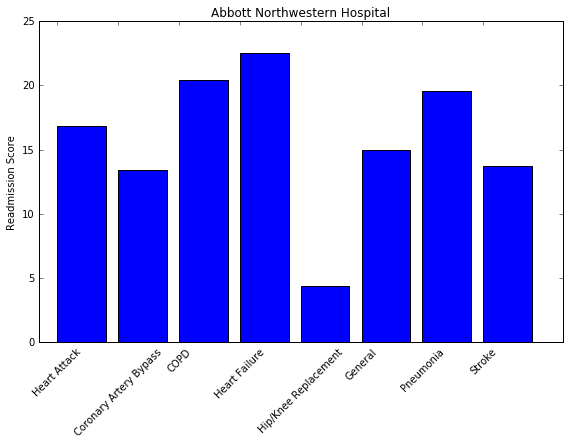

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
wid = .3
ind = ind = np.arange(len(abbot.Score))
plt.bar(ind, abbot.Score)

xTickMarks = [i for i in list_conditions]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
ax.set_xlim(-wid,len(ind)+wid)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.ylabel('Readmission Score')
plt.title('Abbott Northwestern Hospital')
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
plt.show()

In [7]:
readm_only.Score.notnull().count()

38456

In [8]:
readm_only.Score[:1] #Why is this an object and not a float - because of NaNs?

6    16.5
Name: Score, dtype: object

In [9]:
readm_only.Score.unique() #'Not Available' is screwing this up 

array(['16.5', '15.1', '21.1', '21.4', '5.1', '15.4', '18.7', '12.7',
       '16.7', 'Not Available', '18.0', '21.9', '5.7', '14.9', '16.4',
       '13.4', '16.1', '15.2', '19.8', '20.6', '5.0', '17.9', '12.0',
       '19.9', '16.6', '17.3', '11.3', '19.2', '23.1', '15.7', '16.0',
       '17.7', '15.0', '19.6', '15.3', '23.4', '19.4', '12.8', '15.8',
       '21.5', '14.7', '17.1', '12.4', '23.0', '22.4', '4.1', '15.9',
       '18.3', '13.5', '21.3', '14.8', '18.1', '15.6', '19.5', '23.3',
       '4.7', '18.6', '13.8', '14.0', '17.2', '19.0', '4.9', '16.9',
       '13.0', '16.8', '12.6', '23.2', '5.9', '12.1', '21.6', '16.3',
       '23.7', '20.1', '21.7', '16.2', '22.8', '4.6', '12.5', '3.9',
       '20.3', '24.0', '13.7', '4.8', '12.3', '19.7', '21.0', '6.7',
       '13.1', '20.8', '22.2', '11.2', '14.2', '22.3', '17.5', '20.0',
       '22.5', '4.3', '20.4', '19.1', '14.6', '13.3', '17.8', '22.6',
       '14.1', '18.8', '20.7', '20.9', '20.2', '6.2', '22.9', '13.2',
       '5.5', '15.

In [10]:
readm_only[readm_only['Score'] == 0] #There are no 0s in this dataframe

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location


In [11]:
z = readm_only['Score'].replace({'Not Available': np.nan}) 

In [12]:
readm_only['Score'] = z.astype(float)

/Users/sheena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
readm_only.dtypes

Provider ID               int64
Hospital Name            object
Address                  object
City                     object
State                    object
ZIP Code                  int64
County Name              object
Phone Number              int64
Measure Name             object
Measure ID               object
Compared to National     object
Denominator              object
Score                   float64
Lower Estimate           object
Higher Estimate          object
Footnote                 object
Measure Start Date       object
Measure End Date         object
Location                float64
dtype: object

In [14]:
r = pd.pivot_table(readm_only, index=['Hospital Name', 'State'], columns = 'Measure ID', values = 'Score')
#r.index = r.index.droplevel()

In [15]:
r.head()

,Measure ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Hospital Name,State,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,SC,NaN,NaN,20.3,21.1,4.4,15.7,17.3,NaN
ABBEVILLE GENERAL HOSPITAL,LA,NaN,NaN,19.1,24.6,4.2,16.0,17.8,NaN
ABBOTT NORTHWESTERN HOSPITAL,MN,16.8,13.4,20.4,22.5,4.4,15.0,19.6,13.7
ABILENE REGIONAL MEDICAL CENTER,TX,16.4,15.0,18.3,22.4,4.0,14.5,15.5,13.5
ABINGTON MEMORIAL HOSPITAL,PA,18.1,13.9,22.8,21.6,5.4,16.2,16.2,12.3


In [16]:
r.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4785 entries, (ABBEVILLE AREA MEDICAL CENTER, SC) to (ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER, NM)
Data columns (total 8 columns):
READM_30_AMI          2153 non-null float64
READM_30_CABG         1022 non-null float64
READM_30_COPD         3632 non-null float64
READM_30_HF           3633 non-null float64
READM_30_HIP_KNEE     2719 non-null float64
READM_30_HOSP_WIDE    4378 non-null float64
READM_30_PN           4072 non-null float64
READM_30_STK          2599 non-null float64
dtypes: float64(8)
memory usage: 336.4+ KB


In [17]:
r.reset_index(inplace=True)

In [18]:
relevant_columns_hf = ['Hospital Name', 'State', 'READM_30_HF']

In [19]:
relevant_columns_pn = ['Hospital Name', 'State', 'READM_30_PN']

In [20]:
target_HF = r[relevant_columns_hf]

In [21]:
target_PN = r[relevant_columns_pn]

In [22]:
target_PN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 3 columns):
Hospital Name    4785 non-null object
State            4785 non-null object
READM_30_PN      4072 non-null float64
dtypes: float64(1), object(2)
memory usage: 112.2+ KB


In [23]:
target_HF_states = list(target_HF.State.unique())
len(target_HF_states)

56

In [24]:
target_HF = target_HF.dropna()

In [25]:
target_PN = target_PN.dropna()

In [26]:
target_PN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4072 entries, 0 to 4784
Data columns (total 3 columns):
Hospital Name    4072 non-null object
State            4072 non-null object
READM_30_PN      4072 non-null float64
dtypes: float64(1), object(2)
memory usage: 127.2+ KB


In [27]:
target_PN.READM_30_PN.isnull().sum()

0

In [28]:
for x in r.columns[2:]:
    print x

READM_30_AMI
READM_30_CABG
READM_30_COPD
READM_30_HF
READM_30_HIP_KNEE
READM_30_HOSP_WIDE
READM_30_PN
READM_30_STK


In [29]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 10 columns):
Hospital Name         4785 non-null object
State                 4785 non-null object
READM_30_AMI          2153 non-null float64
READM_30_CABG         1022 non-null float64
READM_30_COPD         3632 non-null float64
READM_30_HF           3633 non-null float64
READM_30_HIP_KNEE     2719 non-null float64
READM_30_HOSP_WIDE    4378 non-null float64
READM_30_PN           4072 non-null float64
READM_30_STK          2599 non-null float64
dtypes: float64(8), object(2)
memory usage: 373.9+ KB


In [30]:
lis = []
for x in r.columns[2:]:
    lis.append(r[x].mean(axis=0))

In [31]:
lis

[16.892475615420327,
 14.408855185909992,
 19.999990822320143,
 21.9541884576567,
 4.611107024641412,
 15.577295568752838,
 17.11102652259333,
 12.56514043863026]

## Average Readmission Scores per disease

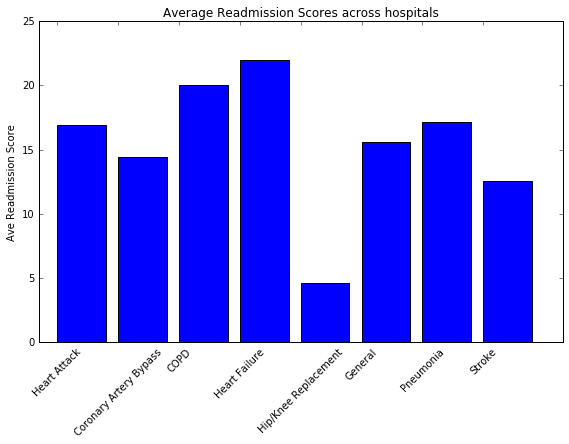

In [32]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

leng = np.arange(len(lis))
plt.bar(leng, lis)

xTickMarks = [i for i in list_conditions]
ax.set_xticks(leng)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
ax.set_xlim(-wid,len(ind)+wid)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.ylabel('Ave Readmission Score')
plt.title('Average Readmission Scores across hospitals')
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
plt.show()
#HF has a large impact and knee_hip has a smaller impact

## Readmission rates by state

In [33]:
r['READM_30_HF'].isnull().sum() # No null values in REadmission rates for HD

1152

In [34]:
r[r['READM_30_HF'] == 0 ] #There are some 0 values here but it is unclear if the 0s are missing values or 0s

Measure ID,Hospital Name,State,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK


In [35]:
target_HF.isnull().sum()

Measure ID
Hospital Name    0
State            0
READM_30_HF      0
dtype: int64

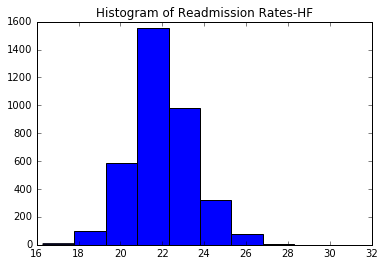

In [36]:
# is this a normal dist? #Are the 0s real 0s or missing values?
plt.hist(target_HF.READM_30_HF)
plt.title('Histogram of Readmission Rates-HF')
plt.show()

In [37]:
len(r.State.unique())

56

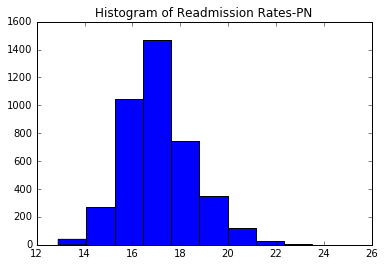

In [38]:
plt.hist(target_PN.READM_30_PN)
plt.title('Histogram of Readmission Rates-PN')
plt.show()

In [39]:
#is it normal?
from scipy import stats
stats.shapiro(r[r['READM_30_HF'] > 0].READM_30_HF) #Yes data is normal without the 0s.

(0.9889797568321228, 3.271633259732009e-16)

In [40]:
states = sorted(target_HF_states)
print states #alpha order states
print len(states)

['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']
56


In [41]:
states = [e for e in states if e not in ('AS','DC','GU','MP','PR','VI')]
len(states)

50

In [42]:
states_cols = ['State','READM_30_HF']

In [43]:
states_cols1 = ['State','READM_30_PN']

In [44]:
#creating dict of states for plotting
states_df = target_HF[states_cols].sort_values('State')
state_hf_target = {}
for i in states:
    state_hf_target[i] = states_df[states_df['State'] == i].READM_30_HF

In [45]:
state_hf_alpha = {}
for i in states:
    state_hf_alpha[i] = state_hf_target[i].mean()

In [46]:
for i in states:
    print "There are %s entries for %s." % (len(state_hf_target[i]), i)

There are 9 entries for AK.
There are 77 entries for AL.
There are 65 entries for AR.
There are 54 entries for AZ.
There are 260 entries for CA.
There are 51 entries for CO.
There are 28 entries for CT.
There are 6 entries for DE.
There are 175 entries for FL.
There are 108 entries for GA.
There are 13 entries for HI.
There are 88 entries for IA.
There are 21 entries for ID.
There are 167 entries for IL.
There are 106 entries for IN.
There are 74 entries for KS.
There are 87 entries for KY.
There are 86 entries for LA.
There are 57 entries for MA.
There are 0 entries for MD.
There are 32 entries for ME.
There are 111 entries for MI.
There are 80 entries for MN.
There are 92 entries for MO.
There are 74 entries for MS.
There are 22 entries for MT.
There are 96 entries for NC.
There are 21 entries for ND.
There are 44 entries for NE.
There are 25 entries for NH.
There are 63 entries for NJ.
There are 31 entries for NM.
There are 27 entries for NV.
There are 155 entries for NY.
There are 

In [47]:
import operator
sorted_dict = sorted(state_hf_alpha.items(), key=operator.itemgetter(1))
#Sorting by value of target

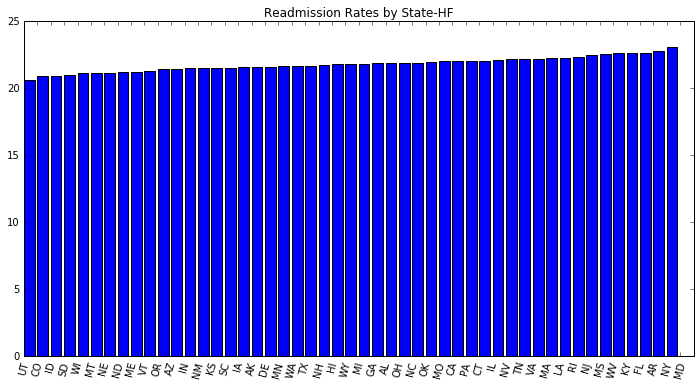

In [48]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)


x_val = [x[0] for x in sorted_dict]
y_val = [x[1] for x in sorted_dict]
ind = np.arange(len(x_val))
plt.bar(range(len(y_val)), y_val)
xTickMarks = [i for i in x_val]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
plt.setp(xtickNames, rotation=75, fontsize=10)
plt.title('Readmission Rates by State-HF')
plt.show()

### HF mean centered

In [49]:
target_HF['norm'] = (target_HF.READM_30_HF - target_HF.READM_30_HF.mean()) / target_HF.READM_30_HF.std()

In [50]:
target_HF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3633 entries, 0 to 4783
Data columns (total 4 columns):
Hospital Name    3633 non-null object
State            3633 non-null object
READM_30_HF      3633 non-null float64
norm             3633 non-null float64
dtypes: float64(2), object(2)
memory usage: 141.9+ KB


In [51]:
states_cols = ['Hospital Name','State','norm']

In [52]:
#creating dict of states for plotting
states_df_hf_norm = target_HF[states_cols].sort_values('State')
state_hf_norm_target = {}
for i in states:
    state_hf_norm_target[i] = states_df_hf_norm[states_df_hf_norm['State'] == i].norm

In [53]:
state_df_hf_alpha = {}
for i in states:
    state_df_hf_alpha[i] = state_hf_norm_target[i].mean()

In [54]:
import operator
sorted_dict2 = sorted(state_df_hf_alpha.items(), key=operator.itemgetter(1))
#Sorting by value of target

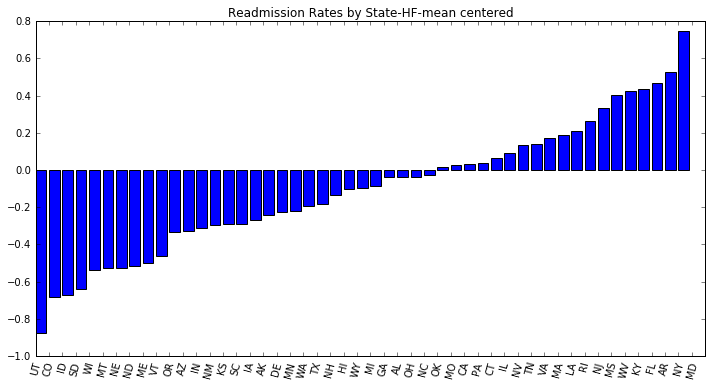

In [55]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)


x_val = [x[0] for x in sorted_dict2]
y_val = [x[1] for x in sorted_dict2]
ind = np.arange(len(x_val))
plt.bar(range(len(y_val)), y_val)
xTickMarks = [i for i in x_val]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
plt.setp(xtickNames, rotation=75, fontsize=10)
plt.title('Readmission Rates by State-HF-mean centered')
plt.show()

In [56]:
len(y_val)

50

In [57]:
hf_values = list(state_hf_alpha.values())
hf_keys = list(state_hf_alpha.keys())

In [58]:
import operator
sorted_dict_pn = sorted(state_pn_alpha.items(), key=operator.itemgetter(1))
#Sorting by value of target

NameError: name 'state_pn_alpha' is not defined

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ind = np.arange(len(x_val))
x_val = [x[0] for x in sorted_dict_pn]
y_val = [x[1] for x in sorted_dict_pn]

plt.bar(range(len(y_val)), y_val)
xTickMarks = [i for i in x_val]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
plt.setp(xtickNames, rotation=75, fontsize=10)
plt.title('Readmission Rates by State-PN')
plt.show()

In [59]:
aves= pd.DataFrame()

In [60]:
aves['states'] = hf_keys
aves['aves'] = hf_values
aves = aves.sort_values('states')
aves

,states,aves
22,AK,21.588889
23,AL,21.900000
24,AR,22.744615
31,AZ,21.466667
18,CA,22.005128
21,CO,20.935294
33,CT,22.050000
1,DE,21.616667
5,FL,22.653714
27,GA,21.898148


In [61]:
percent_medicare = pd.read_csv('raw_data.csv', sep='\t', header=None)
percent_medicare.head()

,0,1
0,Alaska,0.114
1,Utah,0.115
2,Texas,0.132
3,California,0.144
4,Colorado,0.144


In [62]:
percent_medicare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
0    50 non-null object
1    50 non-null float64
dtypes: float64(1), object(1)
memory usage: 872.0+ bytes


In [63]:
percent_medicare.rename(columns={0: "states"}, inplace=True)
percent_medicare.rename(columns={1: "percent"}, inplace=True)
percent_medicare.head()

,states,percent
0,Alaska,0.114
1,Utah,0.115
2,Texas,0.132
3,California,0.144
4,Colorado,0.144


In [64]:
state_abbrev = pd.read_csv('states.csv')

In [65]:
state_abbrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
State           50 non-null object
Abbreviation    50 non-null object
dtypes: object(2)
memory usage: 872.0+ bytes


In [66]:
aves.states.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [67]:
percent_medicare.states.unique()

array(['Alaska', 'Utah', 'Texas', 'California', 'Colorado', 'Georgia',
       'Maryland', 'Nevada', 'North Dakota', 'Illinois', 'Virginia',
       'Wyoming', 'Nebraska', 'Arizona', 'Minnesota', 'Washington',
       'Kansas', 'New Jersey', 'New York', 'Idaho', 'Louisiana', 'Hawaii',
       'Indiana', 'Oklahoma', 'Connecticut', 'North Carolina',
       'Massachusetts', 'New Mexico', 'South Dakota', 'Wisconsin', 'Iowa',
       'Ohio', 'Mississippi', 'Missouri', 'Oregon', 'Tennessee',
       'Delaware', 'Michigan', 'Rhode Island', 'South Carolina',
       'Kentucky', 'Montana', 'Pennsylvania', 'Alabama', 'Florida',
       'Arkansas', 'New Hampshire', 'Vermont', 'West Virginia', 'Maine'], dtype=object)

In [68]:
state_names = state_abbrev['State']
state_abbrevs = state_abbrev['Abbreviation']

In [69]:
state_abbrev_dict = {z[0]:z[1] for z in zip(state_names, state_abbrevs)}

In [70]:
percent_medicare.replace({"states": state_abbrev_dict}, inplace=True)

In [71]:
test = pd.merge(aves, percent_medicare, on='states', how='inner')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
states     50 non-null object
aves       49 non-null float64
percent    50 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [72]:
test

,states,aves,percent
0,AK,21.588889,0.114
1,AL,21.900000,0.199
2,AR,22.744615,0.200
3,AZ,21.466667,0.166
4,CA,22.005128,0.144
5,CO,20.935294,0.144
6,CT,22.050000,0.176
7,DE,21.616667,0.191
8,FL,22.653714,0.199
9,GA,21.898148,0.149


In [73]:
import operator
sorted_dict = sorted(state_hf_alpha.items(), key=operator.itemgetter(1))
#Sorting by value of target

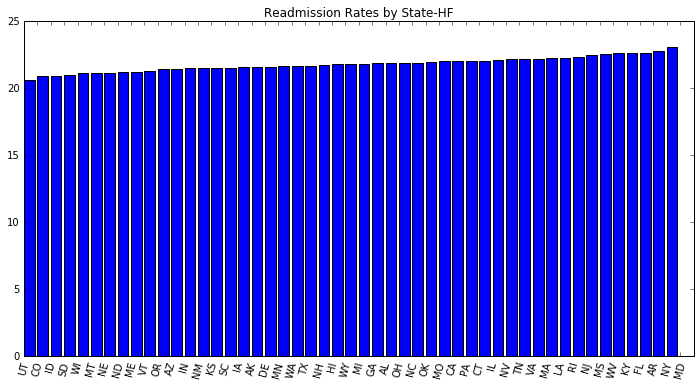

In [74]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)


x_val = [x[0] for x in sorted_dict]
y_val = [x[1] for x in sorted_dict]
ind = np.arange(len(x_val))
plt.bar(range(len(y_val)), y_val)
xTickMarks = [i for i in x_val]
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
plt.setp(xtickNames, rotation=75, fontsize=10)
plt.title('Readmission Rates by State-HF')
plt.show()

In [75]:
test.fillna(0, inplace=True)

In [78]:
import plotly.plotly as py
import plotly.tools as tls

In [79]:
tls.set_credentials_file(username='sheenas',api_key='618CQEhf8rlkmtYhNYi5')

In [80]:
for col in aves.columns:
    aves[col] = aves[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

#aves['text'] = aves['aves']"
aves['text'] = 'Reamission Rate: ' 

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = aves['states'],
        z = aves['aves'].astype(float),
        locationmode = 'USA-states',
        text = aves['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = 'Hospital Readmission Rates by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)

url = py.iplot(fig, filename='d3-cloropleth-map')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sheenas/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


### Feature set 1 - Complications data after Hip/Knee
#### Average complication rates

In [81]:
comp=pd.read_csv('Complications_-_Hospital.csv')

In [82]:
comp.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5,NaN,04/01/2012,03/31/2015,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Blood stream infection after surgery,PSI_13_POST_SEPSIS,No Different than the National Rate,578,5.72,0.00,11.48,NaN,07/01/2013,06/30/2015,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,A wound that splits open after surgery on the...,PSI_14_POSTOP_DEHIS,No Different than the National Rate,445,2.72,0.65,4.79,NaN,07/01/2013,06/30/2015,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Accidental cuts and tears from medical treatment,PSI_15_ACC_LAC,No Different than the National Rate,16429,1.35,0.76,1.95,NaN,07/01/2013,06/30/2015,NaN


In [83]:
comp.info() #Same problem here with the scores being objects and not floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52877 entries, 0 to 52876
Data columns (total 19 columns):
Provider ID             52877 non-null int64
Hospital Name           52877 non-null object
Address                 52877 non-null object
City                    52877 non-null object
State                   52877 non-null object
ZIP Code                52877 non-null int64
County Name             52712 non-null object
Phone Number            52877 non-null int64
Measure Name            52877 non-null object
Measure ID              52877 non-null object
Compared to National    52877 non-null object
Denominator             52877 non-null object
Score                   52877 non-null object
Lower Estimate          52877 non-null object
Higher Estimate         52877 non-null object
Footnote                21804 non-null object
Measure Start Date      52877 non-null object
Measure End Date        52877 non-null object
Location                0 non-null float64
dtypes: float64(1), int

In [84]:
len(comp[comp.Score == 0]) # No 0 values here, so I'm safe to assign Not Availables to 0 

0

In [85]:
comp['Score'].replace('Not Available', 0, inplace=True)

In [86]:
comp['Score'] = comp['Score'].astype(float)
comp.dtypes

Provider ID               int64
Hospital Name            object
Address                  object
City                     object
State                    object
ZIP Code                  int64
County Name              object
Phone Number              int64
Measure Name             object
Measure ID               object
Compared to National     object
Denominator              object
Score                   float64
Lower Estimate           object
Higher Estimate          object
Footnote                 object
Measure Start Date       object
Measure End Date         object
Location                float64
dtype: object

#### High and Low end complication rates

In [87]:
na = len(comp[comp['Lower Estimate'] == 'Not Available'])
zero = len(comp[comp['Lower Estimate'] == 0]) 
print "'Not Available' appears %s times and 0 appears %s times for Lower Estimates." % (na, zero)
#Not Availables exists here too but there are no 0s

'Not Available' appears 21801 times and 0 appears 0 times for Lower Estimates.


In [88]:
na_h = len(comp[comp['Higher Estimate'] == 'Not Available'])
zero_h = len(comp[comp['Higher Estimate'] == 0]) 
print "'Not Available' appears %s times and 0 appears %s times for Higher Estimates." % (na_h, zero_h)
#Not Availables exists here too but there are no 0s

'Not Available' appears 21801 times and 0 appears 0 times for Higher Estimates.


In [89]:
comp['Lower Estimate'] = comp['Lower Estimate'].replace('Not Available', 0)

In [90]:
comp['Lower Estimate'] = comp['Lower Estimate'].astype(float)
comp['Lower Estimate'].dtype

dtype('float64')

In [91]:
comp['Higher Estimate'] = comp['Higher Estimate'].replace('Not Available', 0)
comp['Higher Estimate'] = comp['Higher Estimate'].astype(float)
comp['Higher Estimate'].dtype

dtype('float64')

In [92]:
comp_score = pd.pivot_table(comp, index=['Hospital Name', 'State'], columns = 'Measure ID', values = 'Score')
comp_score.head()

,Measure ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
Hospital Name,State,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,SC,3.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,LA,3.0,6.51,0.00,2.28,1.69,0.35,0.00,0.39,0.16,0.06,1.02
ABBOTT NORTHWESTERN HOSPITAL,MN,2.5,5.23,11.26,1.78,1.96,0.10,124.52,0.32,0.11,0.06,0.97
ABILENE REGIONAL MEDICAL CENTER,TX,3.1,3.43,6.36,2.21,1.17,0.16,138.47,0.40,0.12,0.06,0.67
ABINGTON MEMORIAL HOSPITAL,PA,4.3,8.47,10.30,3.59,1.29,1.09,153.64,0.32,0.13,0.06,1.10


In [93]:
comp_low = pd.pivot_table(comp, index=['Hospital Name', 'State'], columns = 'Measure ID', values = 'Lower Estimate')
comp_low.head()

,Measure ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
Hospital Name,State,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,SC,1.7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,LA,1.7,1.67,0.00,0.00,0.37,0.00,0.00,0.07,0.0,0.06,0.57
ABBOTT NORTHWESTERN HOSPITAL,MN,1.7,3.47,6.15,0.00,1.42,0.00,92.72,0.09,0.0,0.06,0.78
ABILENE REGIONAL MEDICAL CENTER,TX,2.0,0.17,0.00,0.00,0.27,0.00,92.17,0.12,0.0,0.06,0.36
ABINGTON MEMORIAL HOSPITAL,PA,3.3,6.51,4.19,1.53,0.75,0.51,117.66,0.09,0.0,0.06,0.91


In [94]:
col_list_low = list(comp_low.columns.values)

In [95]:
low_cols = []
for i in col_list_low:
    low_cols.append(i + '_low')
print low_cols

['COMP_HIP_KNEE_low', 'PSI_12_POSTOP_PULMEMB_DVT_low', 'PSI_13_POST_SEPSIS_low', 'PSI_14_POSTOP_DEHIS_low', 'PSI_15_ACC_LAC_low', 'PSI_3_ULCER_low', 'PSI_4_SURG_COMP_low', 'PSI_6_IAT_PTX_low', 'PSI_7_CVCBI_low', 'PSI_8_POST_HIP_low', 'PSI_90_SAFETY_low']


In [96]:
comp_low.columns = low_cols

In [97]:
comp_low.head()

,,COMP_HIP_KNEE_low,PSI_12_POSTOP_PULMEMB_DVT_low,PSI_13_POST_SEPSIS_low,PSI_14_POSTOP_DEHIS_low,PSI_15_ACC_LAC_low,PSI_3_ULCER_low,PSI_4_SURG_COMP_low,PSI_6_IAT_PTX_low,PSI_7_CVCBI_low,PSI_8_POST_HIP_low,PSI_90_SAFETY_low
Hospital Name,State,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,SC,1.7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,LA,1.7,1.67,0.00,0.00,0.37,0.00,0.00,0.07,0.0,0.06,0.57
ABBOTT NORTHWESTERN HOSPITAL,MN,1.7,3.47,6.15,0.00,1.42,0.00,92.72,0.09,0.0,0.06,0.78
ABILENE REGIONAL MEDICAL CENTER,TX,2.0,0.17,0.00,0.00,0.27,0.00,92.17,0.12,0.0,0.06,0.36
ABINGTON MEMORIAL HOSPITAL,PA,3.3,6.51,4.19,1.53,0.75,0.51,117.66,0.09,0.0,0.06,0.91


In [98]:
comp_high = pd.pivot_table(comp, index=['Hospital Name','State'], columns = 'Measure ID', values = 'Higher Estimate')

In [99]:
col_list_high = list(comp_high.columns.values)

In [100]:
high_cols = []
for i in col_list_high:
    high_cols.append(i + '_high')
print high_cols

['COMP_HIP_KNEE_high', 'PSI_12_POSTOP_PULMEMB_DVT_high', 'PSI_13_POST_SEPSIS_high', 'PSI_14_POSTOP_DEHIS_high', 'PSI_15_ACC_LAC_high', 'PSI_3_ULCER_high', 'PSI_4_SURG_COMP_high', 'PSI_6_IAT_PTX_high', 'PSI_7_CVCBI_high', 'PSI_8_POST_HIP_high', 'PSI_90_SAFETY_high']


In [101]:
comp_high.columns = high_cols

In [102]:
comp_high.head()

,,COMP_HIP_KNEE_high,PSI_12_POSTOP_PULMEMB_DVT_high,PSI_13_POST_SEPSIS_high,PSI_14_POSTOP_DEHIS_high,PSI_15_ACC_LAC_high,PSI_3_ULCER_high,PSI_4_SURG_COMP_high,PSI_6_IAT_PTX_high,PSI_7_CVCBI_high,PSI_8_POST_HIP_high,PSI_90_SAFETY_high
Hospital Name,State,,,,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,SC,5.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ABBEVILLE GENERAL HOSPITAL,LA,5.0,11.34,0.00,4.60,3.02,1.65,0.00,0.71,0.47,0.06,1.47
ABBOTT NORTHWESTERN HOSPITAL,MN,3.7,6.99,16.38,3.83,2.49,0.80,156.32,0.54,0.32,0.06,1.16
ABILENE REGIONAL MEDICAL CENTER,TX,4.7,6.68,12.96,4.49,2.08,1.04,184.78,0.68,0.40,0.06,0.98
ABINGTON MEMORIAL HOSPITAL,PA,5.7,10.43,16.42,5.65,1.83,1.67,189.61,0.54,0.35,0.06,1.30


#### Features from Hospital-Acquired_Condition_Reduction_Program

In [103]:
reduc = pd.read_csv('Hospital-Acquired_Condition_Reduction_Program.csv')
reduc.head()

,Hospital_Name,Provider ID,State,Fiscal Year,Domain_1_Score,Domain_1_Score_Footnote,Domain_1_Start_Date,Domain_1_End_Date,AHRQ_PSI_90_Score,AHRQ_PSI_90_Score_Footnote,...,MRSA_Score,MRSA_Footnote,CDI_Score,CDI_Footnote,Domain_2_Start_Date,Domain_2_End_Date,Total_HAC_Score,Total_HAC_Score_Footnote,Payment_Reduction,Payment_Reduction_Footnote
0,ADVENTIST MEDICAL CENTER,50121,CA,2017,3.0,NaN,01-JUL-13,30-JUN-15,3.0,NaN,...,4.0,NaN,5.0,NaN,01-JAN-14,31-DEC-15,7.08,NaN,Yes,NaN
1,DAMERON HOSPITAL,50122,CA,2017,10.0,NaN,01-JUL-13,30-JUN-15,10.0,NaN,...,10.0,NaN,9.0,NaN,01-JAN-14,31-DEC-15,8.13,NaN,Yes,NaN
2,USC VERDUGO HILLS HOSPITAL,50124,CA,2017,4.0,NaN,01-JUL-13,30-JUN-15,4.0,NaN,...,4.0,NaN,5.0,NaN,01-JAN-14,31-DEC-15,5.70,NaN,No,NaN
3,REGIONAL MEDICAL CENTER OF SAN JOSE,50125,CA,2017,9.0,NaN,01-JUL-13,30-JUN-15,9.0,NaN,...,9.0,NaN,8.0,NaN,01-JAN-14,31-DEC-15,8.83,NaN,Yes,NaN
4,VALLEY PRESBYTERIAN HOSPITAL,50126,CA,2017,8.0,NaN,01-JUL-13,30-JUN-15,8.0,NaN,...,8.0,NaN,8.0,NaN,01-JAN-14,31-DEC-15,7.32,NaN,Yes,NaN


In [104]:
reduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 28 columns):
Hospital_Name                 3313 non-null object
Provider ID                   3313 non-null int64
State                         3313 non-null object
Fiscal Year                   3313 non-null int64
Domain_1_Score                3179 non-null float64
Domain_1_Score_Footnote       134 non-null float64
Domain_1_Start_Date           3313 non-null object
Domain_1_End_Date             3313 non-null object
AHRQ_PSI_90_Score             3216 non-null float64
AHRQ_PSI_90_Score_Footnote    134 non-null float64
Domain_2_Score                3173 non-null float64
Domain_2_Score_Footnote       170 non-null float64
CLABSI_Score                  2296 non-null float64
CLABSI_Score_Footnote         1034 non-null float64
CAUTI_Score                   2581 non-null float64
CAUTI_Score_Footnote          749 non-null float64
SSI_Score                     2573 non-null float64
SSI_Score_Footnote   

In [105]:
#only grabbing relevant features
feat_list = ['Hospital_Name', 'State', 'AHRQ_PSI_90_Score','CLABSI_Score','CAUTI_Score','SSI_Score','MRSA_Score','CDI_Score']
reduc = reduc[feat_list]
reduc.head()

,Hospital_Name,State,AHRQ_PSI_90_Score,CLABSI_Score,CAUTI_Score,SSI_Score,MRSA_Score,CDI_Score
0,ADVENTIST MEDICAL CENTER,CA,3.0,10.0,10.0,10.0,4.0,5.0
1,DAMERON HOSPITAL,CA,10.0,8.0,9.0,3.0,10.0,9.0
2,USC VERDUGO HILLS HOSPITAL,CA,4.0,10.0,9.0,2.0,4.0,5.0
3,REGIONAL MEDICAL CENTER OF SAN JOSE,CA,9.0,9.0,9.0,9.0,9.0,8.0
4,VALLEY PRESBYTERIAN HOSPITAL,CA,8.0,8.0,4.0,8.0,8.0,8.0


In [106]:
feat_list[2:]

['AHRQ_PSI_90_Score',
 'CLABSI_Score',
 'CAUTI_Score',
 'SSI_Score',
 'MRSA_Score',
 'CDI_Score']

In [107]:
for f in feat_list[2:]:
    null = reduc[f].isnull().sum()
    temp_zero = len(reduc[reduc[f] == 0]) 
    print "There are %s null values, 0 appears %s times for %s." % (null, temp_zero, f)
    #Nans exists here too but there are no 0s

There are 97 null values, 0 appears 0 times for AHRQ_PSI_90_Score.
There are 1017 null values, 0 appears 0 times for CLABSI_Score.
There are 732 null values, 0 appears 0 times for CAUTI_Score.
There are 740 null values, 0 appears 0 times for SSI_Score.
There are 940 null values, 0 appears 0 times for MRSA_Score.
There are 152 null values, 0 appears 0 times for CDI_Score.


In [108]:
for f in feat_list[1:]:
    reduc[f].fillna(value=0,inplace=True)

In [109]:
reduc.info() #Replaced the null values. Don't need to pivot this table 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 8 columns):
Hospital_Name        3313 non-null object
State                3313 non-null object
AHRQ_PSI_90_Score    3313 non-null float64
CLABSI_Score         3313 non-null float64
CAUTI_Score          3313 non-null float64
SSI_Score            3313 non-null float64
MRSA_Score           3313 non-null float64
CDI_Score            3313 non-null float64
dtypes: float64(6), object(2)
memory usage: 207.1+ KB


#### Features related to spending by claim 

In [110]:
spending = pd.read_csv('Medicare_Hospital_Spending_by_Claim.csv')
spending.head()

,Hospital_Name,Provider_ID,State,Period,Claim_Type,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Percent_of_Spending_Hospital,Percent_of_Spending_State,Percent_of_Spending_Nation
0,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Skilled Nursing Facility,$0.00,$0.00,$0.00,0%,0%,0%
1,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Durable Medical Equipment,$18.00,$31.00,$24.00,0.1%,0.16%,0.12%
2,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Carrier,$1062.00,$1480.00,$1540.00,6.01%,7.71%,7.52%
3,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Home Health Agency,$917.00,$948.00,$816.00,5.19%,4.94%,3.98%
4,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Hospice,$172.00,$154.00,$122.00,0.97%,0.8%,0.6%


In [111]:
spending = spending[(spending['Claim_Type'] == 'Inpatient') | (spending['Claim_Type'] == 'Outpatient') ]

In [112]:
spending = spending[(spending['Period'] == '1 through 30 days After Discharge from Index Hospital Admission') | 
                    (spending['Period'] == '1 to 3 days Prior to Index Hospital Admission') |
                    (spending['Period'] == 'During Index Hospital Admission')]

In [113]:
spending['Avg_Spending_Per_Episode_Hospital'] = (spending.Avg_Spending_Per_Episode_Hospital.str.replace('$', ' ')).astype(float) 
#Removing $, convert to float

In [114]:
spending.Avg_Spending_Per_Episode_Hospital.isnull().sum() #No missing values here

0

In [115]:
len(spending[spending['Avg_Spending_Per_Episode_Hospital'] == 0])

4616

In [116]:
spending.Avg_Spending_Per_Episode_Hospital.unique()

array([  2518.,    473.,     12., ...,   1140.,  10706.,   9437.])

In [117]:
spending_in = spending[spending['Claim_Type'] == 'Inpatient']
spending_out = spending[spending['Claim_Type'] == 'Outpatient']

In [118]:
spending_in_pivot = pd.pivot_table(spending_in, index=['Hospital_Name', 'State'], columns='Period', values='Avg_Spending_Per_Episode_Hospital')

In [119]:
spending_in_pivot_col = list(spending_in_pivot.columns.values)
spending_in_cols = []
for i in spending_in_pivot.columns:
    spending_in_cols.append(i + '_inpatient')
print spending_in_cols

['1 through 30 days After Discharge from Index Hospital Admission_inpatient', '1 to 3 days Prior to Index Hospital Admission_inpatient', 'During Index Hospital Admission_inpatient']


In [120]:
spending_in_pivot.columns = spending_in_cols

In [121]:
spending_in_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3156 entries, (ABBEVILLE GENERAL HOSPITAL, LA) to (ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER, NM)
Data columns (total 3 columns):
1 through 30 days After Discharge from Index Hospital Admission_inpatient    3156 non-null float64
1 to 3 days Prior to Index Hospital Admission_inpatient                      3156 non-null float64
During Index Hospital Admission_inpatient                                    3156 non-null float64
dtypes: float64(3)
memory usage: 98.6+ KB


In [122]:
#There are no null values here but I want to check for 0s and for 'Not Availables'. In this case 0 isn't necessarily
# a missing value. There shouldn't be zeros in the During Index Hospital Admission column

In [123]:
for x in ['1 through 30 days After Discharge from Index Hospital Admission_inpatient', 
          '1 to 3 days Prior to Index Hospital Admission_inpatient', 'During Index Hospital Admission_inpatient']:
    print len(spending_in_pivot[spending_in_pivot[x] == 0])

4
1438
0


In [124]:
spending_out_pivot = pd.pivot_table(spending_out, index=['Hospital_Name','State'], columns='Period', values='Avg_Spending_Per_Episode_Hospital')

In [125]:
spending_out_pivot_col = list(spending_out_pivot.columns.values)
spending_out_cols = []
for i in spending_out_pivot.columns:
    spending_out_cols.append(i + '_outpatient')
print spending_out_cols

['1 through 30 days After Discharge from Index Hospital Admission_outpatient', '1 to 3 days Prior to Index Hospital Admission_outpatient', 'During Index Hospital Admission_outpatient']


In [126]:
spending_out_pivot.columns = spending_out_cols

In [127]:
spending_out_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3156 entries, (ABBEVILLE GENERAL HOSPITAL, LA) to (ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER, NM)
Data columns (total 3 columns):
1 through 30 days After Discharge from Index Hospital Admission_outpatient    3156 non-null float64
1 to 3 days Prior to Index Hospital Admission_outpatient                      3156 non-null float64
During Index Hospital Admission_outpatient                                    3156 non-null float64
dtypes: float64(3)
memory usage: 98.6+ KB


In [128]:
spending_out_pivot.head()

,,1 through 30 days After Discharge from Index Hospital Admission_outpatient,1 to 3 days Prior to Index Hospital Admission_outpatient,During Index Hospital Admission_outpatient
Hospital_Name,State,,,
ABBEVILLE GENERAL HOSPITAL,LA,776.0,41.0,0.0
ABBOTT NORTHWESTERN HOSPITAL,MN,903.0,543.0,0.0
ABILENE REGIONAL MEDICAL CENTER,TX,622.0,246.0,0.0
ABINGTON HEALTH LANSDALE HOSPITAL,PA,602.0,27.0,0.0
ABINGTON MEMORIAL HOSPITAL,PA,666.0,45.0,0.0


In [129]:
spending_out_pivot.drop('During Index Hospital Admission_outpatient', axis=1, inplace=True)
#Dropping this column - its all zeros because there is not inpatient spending for outpatient care!!

In [130]:
spending_out_pivot.head()

,,1 through 30 days After Discharge from Index Hospital Admission_outpatient,1 to 3 days Prior to Index Hospital Admission_outpatient
Hospital_Name,State,,
ABBEVILLE GENERAL HOSPITAL,LA,776.0,41.0
ABBOTT NORTHWESTERN HOSPITAL,MN,903.0,543.0
ABILENE REGIONAL MEDICAL CENTER,TX,622.0,246.0
ABINGTON HEALTH LANSDALE HOSPITAL,PA,602.0,27.0
ABINGTON MEMORIAL HOSPITAL,PA,666.0,45.0


In [131]:
for x in ['1 through 30 days After Discharge from Index Hospital Admission_outpatient', 
          '1 to 3 days Prior to Index Hospital Admission_outpatient']:
    print len(spending_out_pivot[spending_out_pivot[x] == 0])

0
4


#### Spending by Claim (HF, AMI, PN)

In [132]:
pay = pd.read_csv('Payment_and_value_of_care_-_Hospital.csv')
pay.head()

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,...,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart attack patients,PAYM_30_AMI,...,"$20,404","$26,226",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart failure patients,PAYM_30_HF,...,"$15,237","$17,547",NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for pneumonia patients,PAYM_30_PN,...,"$13,642","$15,118",NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Payment for heart attack patients,PAYM_30_AMI,...,"$20,910","$25,353",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"200 MED CENTER DRIVE\nFORT PAYNE, AL 35968\n"
4,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Payment for heart failure patients,PAYM_30_HF,...,"$15,113","$18,491",NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"200 MED CENTER DRIVE\nFORT PAYNE, AL 35968\n"


In [133]:
pay_feat_list = ['Hospital name', 'State', 'Payment measure ID', 'Payment', 'Lower estimate', 'Higher estimate']
pay = pay[pay_feat_list]
pay.head ()

,Hospital name,State,Payment measure ID,Payment,Lower estimate,Higher estimate
0,MARSHALL MEDICAL CENTER SOUTH,AL,PAYM_30_AMI,"$23,171","$20,404","$26,226"
1,MARSHALL MEDICAL CENTER SOUTH,AL,PAYM_30_HF,"$16,376","$15,237","$17,547"
2,MARSHALL MEDICAL CENTER SOUTH,AL,PAYM_30_PN,"$14,384","$13,642","$15,118"
3,DEKALB REGIONAL MEDICAL CENTER,AL,PAYM_30_AMI,"$22,997","$20,910","$25,353"
4,DEKALB REGIONAL MEDICAL CENTER,AL,PAYM_30_HF,"$16,722","$15,113","$18,491"


In [134]:
for f in pay_feat_list[3:6]:
    null = pay[f].isnull().sum()
    temp_zero = len(pay[pay[f] == 0]) 
    temp_na = len(pay[pay[f] == 'Not Available']) 
    print "There are %s null values, %s 'Not Availables' and 0 appears %s times for %s." % (null, temp_na, temp_zero, f)
    #Nans exists here too but there are no 0s

There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Payment.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Lower estimate.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Higher estimate.


In [135]:
#Since there are no 0s, I will fill in Not Availables with 0
for f in pay_feat_list[3:6]:
    null = pay[f].isnull().sum()
    temp_zero = len(pay[pay[f] == 0]) 
    temp_na = len(pay[pay[f] == 'Not Available']) 
    print "There are %s null values, %s 'Not Availables' and 0 appears %s times for %s." % (null, temp_na, temp_zero, f)

There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Payment.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Lower estimate.
There are 0 null values, 4547 'Not Availables' and 0 appears 0 times for Higher estimate.


In [136]:
for col in pay.columns[3:6]:
    pay[col] = pay[col].replace({'Not Available':'0'})

In [137]:
for col in pay.columns[3:6]:
    pay[col] = (pay[col].str.replace('$', ''))
    pay[col] = (pay[col].str.replace(',', ''))
    pay[col] = pay[col].astype(float)

In [138]:
pay.head()

,Hospital name,State,Payment measure ID,Payment,Lower estimate,Higher estimate
0,MARSHALL MEDICAL CENTER SOUTH,AL,PAYM_30_AMI,23171.0,20404.0,26226.0
1,MARSHALL MEDICAL CENTER SOUTH,AL,PAYM_30_HF,16376.0,15237.0,17547.0
2,MARSHALL MEDICAL CENTER SOUTH,AL,PAYM_30_PN,14384.0,13642.0,15118.0
3,DEKALB REGIONAL MEDICAL CENTER,AL,PAYM_30_AMI,22997.0,20910.0,25353.0
4,DEKALB REGIONAL MEDICAL CENTER,AL,PAYM_30_HF,16722.0,15113.0,18491.0


In [139]:
#Create 2 pivot tables
pay_pay = pd.pivot_table(pay, index=['Hospital name','State'], columns = 'Payment measure ID', values='Payment')
pay_pay.head()

,Payment measure ID,PAYM_30_AMI,PAYM_30_HF,PAYM_30_PN
Hospital name,State,,,
ABBEVILLE AREA MEDICAL CENTER,SC,0.0,14185.0,11981.0
ABBEVILLE GENERAL HOSPITAL,LA,0.0,17578.0,14218.0
ABBOTT NORTHWESTERN HOSPITAL,MN,21099.0,17110.0,14609.0
ABILENE REGIONAL MEDICAL CENTER,TX,21553.0,17531.0,15194.0
ABINGTON MEMORIAL HOSPITAL,PA,23950.0,17047.0,14605.0


In [140]:
#Creating low estimate table
pay_low = pd.pivot_table(pay, index=['Hospital name','State'], columns = 'Payment measure ID', values = 'Lower estimate')
pay_low.head()

,Payment measure ID,PAYM_30_AMI,PAYM_30_HF,PAYM_30_PN
Hospital name,State,,,
ABBEVILLE AREA MEDICAL CENTER,SC,0.0,12159.0,10546.0
ABBEVILLE GENERAL HOSPITAL,LA,0.0,15713.0,12664.0
ABBOTT NORTHWESTERN HOSPITAL,MN,19867.0,16130.0,13399.0
ABILENE REGIONAL MEDICAL CENTER,TX,19736.0,16058.0,13938.0
ABINGTON MEMORIAL HOSPITAL,PA,22336.0,16325.0,13905.0


In [141]:
pay_low_cols = list(pay_low.columns.values)

In [142]:
pay_low_col_lis = []
for i in pay_low_cols:
    pay_low_col_lis.append(i + '_low')
print pay_low_col_lis

['PAYM_30_AMI_low', 'PAYM_30_HF_low', 'PAYM_30_PN_low']


In [143]:
pay_low.columns = pay_low_col_lis

import re
def regex(row):
    return re.sub(r"[^0-9]", "", row)

pay['Payment'] = pay.apply(regex, axis=1)

pay['New'] = pay.apply(regex('Payment'), axis=1)

In [144]:
pay_pay.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4785 entries, (ABBEVILLE AREA MEDICAL CENTER, SC) to (ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER, NM)
Data columns (total 3 columns):
PAYM_30_AMI    4785 non-null float64
PAYM_30_HF     4785 non-null float64
PAYM_30_PN     4785 non-null float64
dtypes: float64(3)
memory usage: 149.5+ KB


In [145]:
#Creating a high estimates table
pay_high = pd.pivot_table(pay, index=['Hospital name','State'], columns = 'Payment measure ID', values = 'Higher estimate')
pay_high_cols = list(pay_high.columns.values)
pay_high_col_lis = []
for i in pay_high_cols:
    pay_high_col_lis.append(i + '_high')
print pay_high_col_lis

['PAYM_30_AMI_high', 'PAYM_30_HF_high', 'PAYM_30_PN_high']


In [146]:
pay_high.columns = pay_high_col_lis

In [147]:
pay_high.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4785 entries, (ABBEVILLE AREA MEDICAL CENTER, SC) to (ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER, NM)
Data columns (total 3 columns):
PAYM_30_AMI_high    4785 non-null float64
PAYM_30_HF_high     4785 non-null float64
PAYM_30_PN_high     4785 non-null float64
dtypes: float64(3)
memory usage: 149.5+ KB


#### Surveys

In [148]:
surveys = pd.read_csv('Patient_survey__HCAHPS__-_Hospital.csv')

In [149]:
# filteringby relavent features - lots of noise in this dataset
surveys = surveys[(surveys['HCAHPS Measure ID'] == 'H_COMP_1_STAR_RATING') | 
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_2_STAR_RATING') | 
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_3_STAR_RATING') |
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_4_STAR_RATING') |
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_5_STAR_RATING') |
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_6_STAR_RATING') |
                  (surveys['HCAHPS Measure ID'] == 'H_COMP_7_STAR_RATING') |
                  (surveys['HCAHPS Measure ID'] == 'H_RECMND_STAR_RATING')]
                  

In [150]:
#creating dictionary of these ratings...
ratings_dict = {'H_COMP_1_STAR_RATING':'Doctor communication star rating', 
                'H_COMP_2_STAR_RATING':'Nurse communication star rating',
                'H_COMP_3_STAR_RATING':'Staff Responsiveness star rating', 
                'H_COMP_4_STAR_RATING':'Pain Management star rating',
                'H_COMP_5_STAR_RATING':'Communication about Medication star rating', 
                'H_COMP_6_STAR_RATING':'Discharge information star rating',
                'H_COMP_7_STAR_RATING':'Care transition star rating',
                'H_RECMND_STAR_RATING':'Overall hospital star rating'}

In [151]:
(surveys['Patient Survey Star Rating'] == 0).sum() # No 0s so I will change not availables to 0

0

In [152]:
surveys['Patient Survey Star Rating'] = surveys['Patient Survey Star Rating'].replace({'Not Available':'0'})
surveys['Patient Survey Star Rating'] = surveys['Patient Survey Star Rating'].astype(float, inplace = True)
surveys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38456 entries, 9 to 264384
Data columns (total 23 columns):
Provider ID                              38456 non-null int64
Hospital Name                            38456 non-null object
Address                                  38456 non-null object
City                                     38456 non-null object
State                                    38456 non-null object
ZIP Code                                 38456 non-null int64
County Name                              38336 non-null object
Phone Number                             38456 non-null int64
HCAHPS Measure ID                        38456 non-null object
HCAHPS Question                          38456 non-null object
HCAHPS Answer Description                38456 non-null object
Patient Survey Star Rating               38456 non-null float64
Patient Survey Star Rating Footnote      10472 non-null object
HCAHPS Answer Percent                    38456 non-null object
HCAHPS Ans

In [153]:
surveys_pivot = pd.pivot_table(surveys, index=['Hospital Name', 'State'], columns ='HCAHPS Measure ID', 
                               values = 'Patient Survey Star Rating' )
surveys_pivot

,HCAHPS Measure ID,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_RECMND_STAR_RATING
Hospital Name,State,,,,,,,,
ABBEVILLE AREA MEDICAL CENTER,SC,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0
ABBEVILLE GENERAL HOSPITAL,LA,3.0,5.0,4.0,4.0,3.0,2.0,4.0,1.0
ABBOTT NORTHWESTERN HOSPITAL,MN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
ABILENE REGIONAL MEDICAL CENTER,TX,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0
ABINGTON MEMORIAL HOSPITAL,PA,4.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
ABRAHAM LINCOLN MEMORIAL HOSPITAL,IL,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0
ABRAZO ARROWHEAD CAMPUS,AZ,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0
ABRAZO CENTRAL CAMPUS,AZ,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
ABRAZO MARYVALE CAMPUS,AZ,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0


#### Joining feature sets

In [154]:
#making copies of all dataframes to maniupulate
comp_score_copy = comp_score.copy()
comp_score_low_copy = comp_low.copy()
comp_score_high_copy = comp_high.copy()
spending_in_pivot_copy = spending_in_pivot.copy()
spending_out_pivot_copy = spending_out_pivot.copy()
reduc_copy = reduc.copy()
pay_pay_copy = pay_pay.copy()
pay_low_copy = pay_low.copy()
pay_high_copy = pay_high.copy()
surveys_pivot_copy = surveys_pivot.copy()
target_HF_copy = target_HF.copy()

In [155]:
funcs = [comp_score_copy, comp_score_high_copy, comp_score_low_copy, spending_in_pivot_copy, 
         spending_out_pivot_copy, pay_pay_copy, pay_low_copy, pay_high_copy, surveys_pivot_copy]
for func in funcs:
    func.reset_index(inplace=True)
    #reseting index so that I can have hospital name as column to join on

In [156]:
pay_high_copy.info() #Need to rename Hospital_Name so that they match in all dfs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 5 columns):
Hospital name       4785 non-null object
State               4785 non-null object
PAYM_30_AMI_high    4785 non-null float64
PAYM_30_HF_high     4785 non-null float64
PAYM_30_PN_high     4785 non-null float64
dtypes: float64(3), object(2)
memory usage: 187.0+ KB


In [157]:
spending_in_pivot_copy.rename(columns={"Hospital_Name": "Hospital Name"}, inplace=True)
spending_out_pivot_copy.rename(columns={"Hospital_Name": "Hospital Name"}, inplace=True)

In [158]:
reduc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 8 columns):
Hospital_Name        3313 non-null object
State                3313 non-null object
AHRQ_PSI_90_Score    3313 non-null float64
CLABSI_Score         3313 non-null float64
CAUTI_Score          3313 non-null float64
SSI_Score            3313 non-null float64
MRSA_Score           3313 non-null float64
CDI_Score            3313 non-null float64
dtypes: float64(6), object(2)
memory usage: 207.1+ KB


In [159]:
reduc_copy.rename(columns={"Hospital_Name": "Hospital Name"}, inplace=True)

In [160]:
pay_pay_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 5 columns):
Hospital name    4785 non-null object
State            4785 non-null object
PAYM_30_AMI      4785 non-null float64
PAYM_30_HF       4785 non-null float64
PAYM_30_PN       4785 non-null float64
dtypes: float64(3), object(2)
memory usage: 187.0+ KB


In [161]:
pay_pay_copy.rename(columns={"Hospital name": "Hospital Name"}, inplace=True)
pay_low_copy.rename(columns={"Hospital name": "Hospital Name"}, inplace=True)
pay_high_copy.rename(columns={"Hospital name": "Hospital Name"}, inplace=True)

In [162]:
comp_score_low_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 13 columns):
Hospital Name                    4785 non-null object
State                            4785 non-null object
COMP_HIP_KNEE_low                4785 non-null float64
PSI_12_POSTOP_PULMEMB_DVT_low    4785 non-null float64
PSI_13_POST_SEPSIS_low           4785 non-null float64
PSI_14_POSTOP_DEHIS_low          4785 non-null float64
PSI_15_ACC_LAC_low               4785 non-null float64
PSI_3_ULCER_low                  4785 non-null float64
PSI_4_SURG_COMP_low              4785 non-null float64
PSI_6_IAT_PTX_low                4785 non-null float64
PSI_7_CVCBI_low                  4785 non-null float64
PSI_8_POST_HIP_low               4785 non-null float64
PSI_90_SAFETY_low                4785 non-null float64
dtypes: float64(11), object(2)
memory usage: 486.0+ KB


In [163]:
comp_score_low_copy.head()

,Hospital Name,State,COMP_HIP_KNEE_low,PSI_12_POSTOP_PULMEMB_DVT_low,PSI_13_POST_SEPSIS_low,PSI_14_POSTOP_DEHIS_low,PSI_15_ACC_LAC_low,PSI_3_ULCER_low,PSI_4_SURG_COMP_low,PSI_6_IAT_PTX_low,PSI_7_CVCBI_low,PSI_8_POST_HIP_low,PSI_90_SAFETY_low
0,ABBEVILLE AREA MEDICAL CENTER,SC,1.7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
1,ABBEVILLE GENERAL HOSPITAL,LA,1.7,1.67,0.00,0.00,0.37,0.00,0.00,0.07,0.0,0.06,0.57
2,ABBOTT NORTHWESTERN HOSPITAL,MN,1.7,3.47,6.15,0.00,1.42,0.00,92.72,0.09,0.0,0.06,0.78
3,ABILENE REGIONAL MEDICAL CENTER,TX,2.0,0.17,0.00,0.00,0.27,0.00,92.17,0.12,0.0,0.06,0.36
4,ABINGTON MEMORIAL HOSPITAL,PA,3.3,6.51,4.19,1.53,0.75,0.51,117.66,0.09,0.0,0.06,0.91


In [164]:
comp_score_copy.head()

Measure ID,Hospital Name,State,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
0,ABBEVILLE AREA MEDICAL CENTER,SC,3.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,ABBEVILLE GENERAL HOSPITAL,LA,3.0,6.51,0.00,2.28,1.69,0.35,0.00,0.39,0.16,0.06,1.02
2,ABBOTT NORTHWESTERN HOSPITAL,MN,2.5,5.23,11.26,1.78,1.96,0.10,124.52,0.32,0.11,0.06,0.97
3,ABILENE REGIONAL MEDICAL CENTER,TX,3.1,3.43,6.36,2.21,1.17,0.16,138.47,0.40,0.12,0.06,0.67
4,ABINGTON MEMORIAL HOSPITAL,PA,4.3,8.47,10.30,3.59,1.29,1.09,153.64,0.32,0.13,0.06,1.10


In [165]:
#Just merging one by one and checking
d = pd.merge(target_HF_copy, comp_score_copy, on=['Hospital Name', 'State'], how='inner')
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3633 entries, 0 to 3632
Data columns (total 15 columns):
Hospital Name                3633 non-null object
State                        3633 non-null object
READM_30_HF                  3633 non-null float64
norm                         3633 non-null float64
COMP_HIP_KNEE                3633 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3633 non-null float64
PSI_13_POST_SEPSIS           3633 non-null float64
PSI_14_POSTOP_DEHIS          3633 non-null float64
PSI_15_ACC_LAC               3633 non-null float64
PSI_3_ULCER                  3633 non-null float64
PSI_4_SURG_COMP              3633 non-null float64
PSI_6_IAT_PTX                3633 non-null float64
PSI_7_CVCBI                  3633 non-null float64
PSI_8_POST_HIP               3633 non-null float64
PSI_90_SAFETY                3633 non-null float64
dtypes: float64(13), object(2)
memory usage: 454.1+ KB


In [166]:
#Just merging one by one and checking
d = pd.merge(d, comp_score_low_copy, on=['Hospital Name', 'State'], how='inner')
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3633 entries, 0 to 3632
Data columns (total 26 columns):
Hospital Name                    3633 non-null object
State                            3633 non-null object
READM_30_HF                      3633 non-null float64
norm                             3633 non-null float64
COMP_HIP_KNEE                    3633 non-null float64
PSI_12_POSTOP_PULMEMB_DVT        3633 non-null float64
PSI_13_POST_SEPSIS               3633 non-null float64
PSI_14_POSTOP_DEHIS              3633 non-null float64
PSI_15_ACC_LAC                   3633 non-null float64
PSI_3_ULCER                      3633 non-null float64
PSI_4_SURG_COMP                  3633 non-null float64
PSI_6_IAT_PTX                    3633 non-null float64
PSI_7_CVCBI                      3633 non-null float64
PSI_8_POST_HIP                   3633 non-null float64
PSI_90_SAFETY                    3633 non-null float64
COMP_HIP_KNEE_low                3633 non-null float64
PSI_12_POSTOP_P

In [167]:
d = pd.merge(d, comp_score_high_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3633 entries, 0 to 3632
Data columns (total 37 columns):
Hospital Name                     3633 non-null object
State                             3633 non-null object
READM_30_HF                       3633 non-null float64
norm                              3633 non-null float64
COMP_HIP_KNEE                     3633 non-null float64
PSI_12_POSTOP_PULMEMB_DVT         3633 non-null float64
PSI_13_POST_SEPSIS                3633 non-null float64
PSI_14_POSTOP_DEHIS               3633 non-null float64
PSI_15_ACC_LAC                    3633 non-null float64
PSI_3_ULCER                       3633 non-null float64
PSI_4_SURG_COMP                   3633 non-null float64
PSI_6_IAT_PTX                     3633 non-null float64
PSI_7_CVCBI                       3633 non-null float64
PSI_8_POST_HIP                    3633 non-null float64
PSI_90_SAFETY                     3633 non-null float64
COMP_HIP_KNEE_low                 3633 non-null float64

In [168]:
## just names of all the feature tables
#comp_score_copy, comp_score_high_copy, comp_score_low_copy, spending_in_pivot_copy, 
         #spending_out_pivot_copy, pay_pay_copy, pay_low_copy, pay_high_copy, reduc_copy

In [169]:
d = pd.merge(d, spending_in_pivot_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2423 entries, 0 to 2422
Data columns (total 40 columns):
Hospital Name                                                                2423 non-null object
State                                                                        2423 non-null object
READM_30_HF                                                                  2423 non-null float64
norm                                                                         2423 non-null float64
COMP_HIP_KNEE                                                                2423 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                    2423 non-null float64
PSI_13_POST_SEPSIS                                                           2423 non-null float64
PSI_14_POSTOP_DEHIS                                                          2423 non-null float64
PSI_15_ACC_LAC                                                               2423 non-null float64
PSI_

In [170]:
d = pd.merge(d, spending_out_pivot_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2423 entries, 0 to 2422
Data columns (total 42 columns):
Hospital Name                                                                 2423 non-null object
State                                                                         2423 non-null object
READM_30_HF                                                                   2423 non-null float64
norm                                                                          2423 non-null float64
COMP_HIP_KNEE                                                                 2423 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2423 non-null float64
PSI_13_POST_SEPSIS                                                            2423 non-null float64
PSI_14_POSTOP_DEHIS                                                           2423 non-null float64
PSI_15_ACC_LAC                                                                2423 non-null flo

In [171]:
d = pd.merge(d, reduc_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 48 columns):
Hospital Name                                                                 2431 non-null object
State                                                                         2431 non-null object
READM_30_HF                                                                   2431 non-null float64
norm                                                                          2431 non-null float64
COMP_HIP_KNEE                                                                 2431 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2431 non-null float64
PSI_13_POST_SEPSIS                                                            2431 non-null float64
PSI_14_POSTOP_DEHIS                                                           2431 non-null float64
PSI_15_ACC_LAC                                                                2431 non-null flo

In [172]:
d = pd.merge(d, pay_pay_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 51 columns):
Hospital Name                                                                 2431 non-null object
State                                                                         2431 non-null object
READM_30_HF                                                                   2431 non-null float64
norm                                                                          2431 non-null float64
COMP_HIP_KNEE                                                                 2431 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2431 non-null float64
PSI_13_POST_SEPSIS                                                            2431 non-null float64
PSI_14_POSTOP_DEHIS                                                           2431 non-null float64
PSI_15_ACC_LAC                                                                2431 non-null flo

In [173]:
d = pd.merge(d, pay_low_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 54 columns):
Hospital Name                                                                 2431 non-null object
State                                                                         2431 non-null object
READM_30_HF                                                                   2431 non-null float64
norm                                                                          2431 non-null float64
COMP_HIP_KNEE                                                                 2431 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2431 non-null float64
PSI_13_POST_SEPSIS                                                            2431 non-null float64
PSI_14_POSTOP_DEHIS                                                           2431 non-null float64
PSI_15_ACC_LAC                                                                2431 non-null flo

In [174]:
d = pd.merge(d, pay_high_copy, on=['Hospital Name','State'], how='inner', copy=True)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 57 columns):
Hospital Name                                                                 2431 non-null object
State                                                                         2431 non-null object
READM_30_HF                                                                   2431 non-null float64
norm                                                                          2431 non-null float64
COMP_HIP_KNEE                                                                 2431 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2431 non-null float64
PSI_13_POST_SEPSIS                                                            2431 non-null float64
PSI_14_POSTOP_DEHIS                                                           2431 non-null float64
PSI_15_ACC_LAC                                                                2431 non-null flo

In [175]:
features = pd.merge(d, surveys_pivot_copy, on=['Hospital Name','State'], how='inner', copy=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 65 columns):
Hospital Name                                                                 2431 non-null object
State                                                                         2431 non-null object
READM_30_HF                                                                   2431 non-null float64
norm                                                                          2431 non-null float64
COMP_HIP_KNEE                                                                 2431 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2431 non-null float64
PSI_13_POST_SEPSIS                                                            2431 non-null float64
PSI_14_POSTOP_DEHIS                                                           2431 non-null float64
PSI_15_ACC_LAC                                                                2431 non-null flo

In [176]:
features.head()  #Including target

,Hospital Name,State,READM_30_HF,norm,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,...,PAYM_30_HF_high,PAYM_30_PN_high,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_RECMND_STAR_RATING
0,ABBEVILLE GENERAL HOSPITAL,LA,24.6,1.769519,3.0,6.51,0.00,2.28,1.69,0.35,...,19513.0,15770.0,3.0,5.0,4.0,4.0,3.0,2.0,4.0,1.0
1,ABBOTT NORTHWESTERN HOSPITAL,MN,22.5,0.365039,2.5,5.23,11.26,1.78,1.96,0.10,...,18148.0,15808.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
2,ABILENE REGIONAL MEDICAL CENTER,TX,22.4,0.298159,3.1,3.43,6.36,2.21,1.17,0.16,...,19077.0,16470.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0
3,ABINGTON MEMORIAL HOSPITAL,PA,21.6,-0.236881,4.3,8.47,10.30,3.59,1.29,1.09,...,17847.0,15275.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
4,ABRAZO CENTRAL CAMPUS,AZ,21.8,-0.103121,2.7,3.48,9.23,2.16,1.31,0.21,...,18570.0,16999.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0


In [177]:
features.drop('norm', axis=1, inplace=True)
#Dropping this column - its all zeros because there is not inpatient spending for outpatient care!!

In [178]:
#     plt.figure(figsize=(8,6));
#     i = 0
#     for x in tar_col:
#         i += 1
#         plt.subplot(4,2,i)
#         target[x].hist()
#         plt.title('Histogram for %s' % x)
#         plt.tight_layout()

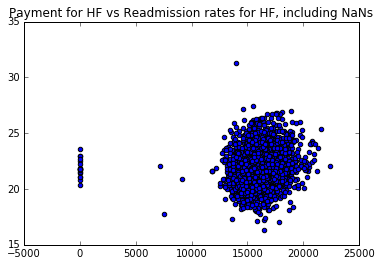

In [179]:
plt.scatter(features['PAYM_30_HF'], features['READM_30_HF'])
plt.title('Payment for HF vs Readmission rates for HF, including NaNs')

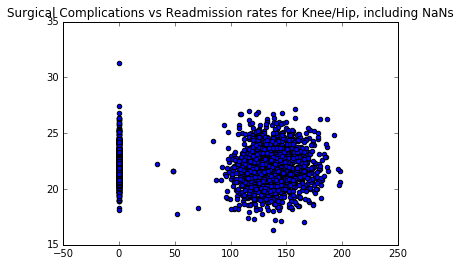

In [180]:
plt.scatter(features['PSI_4_SURG_COMP'], features['READM_30_HF'])
plt.title('Surgical Complications vs Readmission rates for Knee/Hip, including NaNs')

## So far I've left missing values in and I'm going to train a model with that - just to see if the missing values are useful info

## Trying linear model for HF using intuition to select features:
#### 1) Need to normalize data including 0s for NaNs
#### 2) Need to normalize data including imputed means for NaNs
#### 3) Try linear regressor on a few states

In [181]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 64 columns):
Hospital Name                                                                 2431 non-null object
State                                                                         2431 non-null object
READM_30_HF                                                                   2431 non-null float64
COMP_HIP_KNEE                                                                 2431 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2431 non-null float64
PSI_13_POST_SEPSIS                                                            2431 non-null float64
PSI_14_POSTOP_DEHIS                                                           2431 non-null float64
PSI_15_ACC_LAC                                                                2431 non-null float64
PSI_3_ULCER                                                                   2431 non-null flo

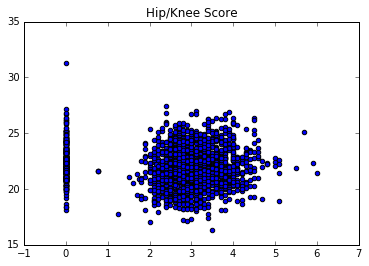

In [182]:
plt.scatter(features.COMP_HIP_KNEE, features.READM_30_HF)
plt.title('Hip/Knee Score')

In [183]:
features_hf_cols = ['PSI_4_SURG_COMP', 'PSI_12_POSTOP_PULMEMB_DVT', 
                     '1 through 30 days After Discharge from Index Hospital Admission_inpatient', 
                     '1 through 30 days After Discharge from Index Hospital Admission_outpatient', 
                     'During Index Hospital Admission_inpatient','AHRQ_PSI_90_Score', 
                     'MRSA_Score', 'CAUTI_Score', 'CDI_Score', 'PAYM_30_HF', 'PAYM_30_HF_low', 'PAYM_30_HF_high']

#### 1) Normalized , including 0s in place of NaNs

In [184]:
features_hf = features[features_hf_cols]
target_hf = features['READM_30_HF']

In [185]:
features_hf_norm = (features_hf - features_hf.mean()) /  (features_hf.std())
features_hf_norm.head()

,PSI_4_SURG_COMP,PSI_12_POSTOP_PULMEMB_DVT,1 through 30 days After Discharge from Index Hospital Admission_inpatient,1 through 30 days After Discharge from Index Hospital Admission_outpatient,During Index Hospital Admission_inpatient,AHRQ_PSI_90_Score,MRSA_Score,CAUTI_Score,CDI_Score,PAYM_30_HF,PAYM_30_HF_low,PAYM_30_HF_high
0,-1.231078,0.825961,-0.023391,0.427037,-0.561662,1.209192,-1.222990,-0.462444,-1.269374,0.817965,0.580564,0.959934
1,0.595422,0.202899,-0.150855,1.028662,1.964005,0.869517,-0.640887,1.042510,0.150059,0.584466,0.791408,0.322560
2,0.800045,-0.673283,1.192827,-0.302492,0.881319,-1.508206,1.687522,-0.161453,0.150059,0.794515,0.755004,0.756348
3,1.022563,1.780025,-0.455352,-0.094055,0.168536,1.548866,-0.349836,1.042510,-0.204799,0.553034,0.890004,0.182011
4,0.794471,-0.648944,0.930818,0.346505,1.708196,-0.828857,0.814369,0.741520,0.150059,0.477197,0.342923,0.519609


In [186]:
data_to_norm = features.iloc[:,2:]
full_norm = (data_to_norm - data_to_norm.mean()) /  (data_to_norm.std()) #normalizing data

In [187]:
full_norm.head()

,READM_30_HF,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,...,PAYM_30_HF_high,PAYM_30_PN_high,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_RECMND_STAR_RATING
0,1.622811,0.419096,0.825961,-1.630935,0.323927,0.528302,-0.194666,-1.231078,-0.185469,-0.111823,...,0.959934,-0.036533,-0.187807,1.910103,0.857952,1.218663,0.165745,-1.008677,1.184311,-1.700089
1,0.306051,0.044311,0.202899,0.719409,-0.244889,1.085077,-0.676067,0.595422,-1.056106,-0.763773,...,0.322560,-0.019528,0.717466,0.968782,0.857952,1.218663,1.211856,0.855206,1.184311,1.864883
2,0.243349,0.494053,-0.673283,-0.303387,0.244293,-0.544005,-0.560531,0.800045,-0.061093,-0.633383,...,0.756348,0.276709,-1.093081,0.027460,-0.112283,-0.858147,-0.880365,-0.076735,-0.677351,0.082397
3,-0.258274,1.393539,1.780025,0.519024,1.814226,-0.296549,1.230282,1.022563,-1.056106,-0.502993,...,0.182011,-0.258040,0.717466,0.027460,-0.112283,-0.858147,0.165745,-0.076735,0.253480,0.082397
4,-0.132868,0.194225,-0.648944,0.295679,0.187411,-0.255307,-0.464251,0.794471,1.307051,0.540127,...,0.519609,0.513431,-1.093081,-0.913862,-1.082517,-0.858147,-0.880365,-1.008677,-1.608182,-0.808846


In [188]:
full_norm.insert(0, 'Hospital Name', features['Hospital Name'])
full_norm.insert(1, 'State', features['State'])
full_norm.head()

,Hospital Name,State,READM_30_HF,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,...,PAYM_30_HF_high,PAYM_30_PN_high,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_RECMND_STAR_RATING
0,ABBEVILLE GENERAL HOSPITAL,LA,1.622811,0.419096,0.825961,-1.630935,0.323927,0.528302,-0.194666,-1.231078,...,0.959934,-0.036533,-0.187807,1.910103,0.857952,1.218663,0.165745,-1.008677,1.184311,-1.700089
1,ABBOTT NORTHWESTERN HOSPITAL,MN,0.306051,0.044311,0.202899,0.719409,-0.244889,1.085077,-0.676067,0.595422,...,0.322560,-0.019528,0.717466,0.968782,0.857952,1.218663,1.211856,0.855206,1.184311,1.864883
2,ABILENE REGIONAL MEDICAL CENTER,TX,0.243349,0.494053,-0.673283,-0.303387,0.244293,-0.544005,-0.560531,0.800045,...,0.756348,0.276709,-1.093081,0.027460,-0.112283,-0.858147,-0.880365,-0.076735,-0.677351,0.082397
3,ABINGTON MEMORIAL HOSPITAL,PA,-0.258274,1.393539,1.780025,0.519024,1.814226,-0.296549,1.230282,1.022563,...,0.182011,-0.258040,0.717466,0.027460,-0.112283,-0.858147,0.165745,-0.076735,0.253480,0.082397
4,ABRAZO CENTRAL CAMPUS,AZ,-0.132868,0.194225,-0.648944,0.295679,0.187411,-0.255307,-0.464251,0.794471,...,0.519609,0.513431,-1.093081,-0.913862,-1.082517,-0.858147,-0.880365,-1.008677,-1.608182,-0.808846


#### 2) Normalized , including imputed values in place of NaNs

In [189]:
cols_dont_fill_0 = ['Hospital Name', 'State', 'README_30_HF','1 through 30 days After Discharge from Index Hospital Admission_inpatient', 
                    '1 to 3 days Prior to Index Hospital Admission_inpatient','During Index Hospital Admission_inpatient',
                    '1 through 30 days After Discharge from Index Hospital Admission_outpatient',
                    '1 to 3 days Prior to Index Hospital Admission_outpatient', ]

In [190]:
full_copy = features.copy()

In [191]:
for i in list(full_copy.columns):
    if i in cols_dont_fill_0:
        pass
    else:
        full_copy[i] = full_copy[i].replace(0, np.nan)  

In [192]:
#Checking if the loop worked correctly

In [193]:
len(full_copy[full_copy['1 through 30 days After Discharge from Index Hospital Admission_inpatient'] == 0])

0

In [194]:
full_copy['1 through 30 days After Discharge from Index Hospital Admission_inpatient'].isnull().sum()

0

In [195]:
len(features[features['CAUTI_Score'] == 0])

359

In [196]:
full_copy['CAUTI_Score'].isnull().sum() # THere should be 359 nulls here now

359

In [197]:
full_copy['READM_30_HF'].isnull().sum() #Good, the zeros in the target column shouldn't be replaced

0

In [198]:
full_copy.head()

,Hospital Name,State,READM_30_HF,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,...,PAYM_30_HF_high,PAYM_30_PN_high,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_RECMND_STAR_RATING
0,ABBEVILLE GENERAL HOSPITAL,LA,24.6,3.0,6.51,NaN,2.28,1.69,0.35,NaN,...,19513.0,15770.0,3.0,5.0,4.0,4.0,3.0,2.0,4.0,1.0
1,ABBOTT NORTHWESTERN HOSPITAL,MN,22.5,2.5,5.23,11.26,1.78,1.96,0.10,124.52,...,18148.0,15808.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
2,ABILENE REGIONAL MEDICAL CENTER,TX,22.4,3.1,3.43,6.36,2.21,1.17,0.16,138.47,...,19077.0,16470.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0
3,ABINGTON MEMORIAL HOSPITAL,PA,21.6,4.3,8.47,10.30,3.59,1.29,1.09,153.64,...,17847.0,15275.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
4,ABRAZO CENTRAL CAMPUS,AZ,21.8,2.7,3.48,9.23,2.16,1.31,0.21,138.09,...,18570.0,16999.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0


In [199]:
#filling nans with imputed mean
for col in list(full_copy.columns):
    if col in cols_dont_fill_0:
        pass
    else:
        full_copy[col] = full_copy.loc[:,col].fillna(full_copy[col].mean())

In [200]:
full_copy.head()

,Hospital Name,State,READM_30_HF,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,...,PAYM_30_HF_high,PAYM_30_PN_high,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_RECMND_STAR_RATING
0,ABBEVILLE GENERAL HOSPITAL,LA,24.6,3.0,6.51,10.261768,2.28,1.69,0.35,136.656478,...,19513.0,15770.0,3.0,5.0,4.0,4.0,3.0,2.0,4.0,1.0
1,ABBOTT NORTHWESTERN HOSPITAL,MN,22.5,2.5,5.23,11.260000,1.78,1.96,0.10,124.520000,...,18148.0,15808.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0
2,ABILENE REGIONAL MEDICAL CENTER,TX,22.4,3.1,3.43,6.360000,2.21,1.17,0.16,138.470000,...,19077.0,16470.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0
3,ABINGTON MEMORIAL HOSPITAL,PA,21.6,4.3,8.47,10.300000,3.59,1.29,1.09,153.640000,...,17847.0,15275.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
4,ABRAZO CENTRAL CAMPUS,AZ,21.8,2.7,3.48,9.230000,2.16,1.31,0.21,138.090000,...,18570.0,16999.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0


In [201]:
full_copy['READM_30_HF'].isnull().sum() #Good still works

0

In [202]:
full_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 64 columns):
Hospital Name                                                                 2431 non-null object
State                                                                         2431 non-null object
READM_30_HF                                                                   2431 non-null float64
COMP_HIP_KNEE                                                                 2431 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2431 non-null float64
PSI_13_POST_SEPSIS                                                            2431 non-null float64
PSI_14_POSTOP_DEHIS                                                           2431 non-null float64
PSI_15_ACC_LAC                                                                2431 non-null float64
PSI_3_ULCER                                                                   2431 non-null flo

In [203]:
full_imputed = full_copy
imputed_data_norm = full_imputed.iloc[:,2:]
full_imputed_norm = (imputed_data_norm - imputed_data_norm.mean()) /  (imputed_data_norm.std()) #normalizing data

In [204]:
full_imputed_norm.head()

,READM_30_HF,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,...,PAYM_30_HF_high,PAYM_30_PN_high,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_RECMND_STAR_RATING
0,1.622811,-0.112615,0.830597,-4.729782e-14,-0.104145,0.528036,-0.195831,-7.273570e-14,-0.188529,-0.112840,...,1.266338,-0.195070,-0.316282,2.084932,0.899905,1.311527,0.090351,-1.258663,1.233180,-1.985627
1,0.306051,-1.072582,0.110974,5.111392e-01,-1.493551,1.085816,-0.677457,-8.173471e-01,-1.063747,-0.765439,...,0.368655,-0.167920,0.729087,1.010829,0.899905,1.311527,1.308150,0.886068,1.233180,1.998071
2,0.243349,0.079379,-0.900997,-1.997878e+00,-0.298662,-0.546205,-0.561867,1.221340e-01,-0.063497,-0.634919,...,0.979606,0.305071,-1.361651,-0.063274,-0.236488,-1.095403,-1.127449,-0.186297,-0.836879,0.006222
3,-0.258274,2.383299,1.932521,1.957673e-02,3.536101,-0.298303,1.229782,1.143778e+00,-1.063747,-0.504399,...,0.170705,-0.548742,0.729087,-0.063274,-0.236488,-1.095403,0.090351,-0.186297,0.198151,0.006222
4,-0.132868,-0.688595,-0.872887,-5.283107e-01,-0.437602,-0.256986,-0.465541,9.654242e-02,1.311845,0.539759,...,0.646181,0.683035,-1.361651,-1.137377,-1.372880,-1.095403,-1.127449,-1.258663,-1.871909,-0.989703


In [205]:
full_imputed_norm.insert(0, 'Hospital Name', full_imputed['Hospital Name'])
full_imputed_norm.insert(1, 'State', full_imputed['State'])

In [206]:
full_imputed_norm.head()

,Hospital Name,State,READM_30_HF,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,...,PAYM_30_HF_high,PAYM_30_PN_high,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_RECMND_STAR_RATING
0,ABBEVILLE GENERAL HOSPITAL,LA,1.622811,-0.112615,0.830597,-4.729782e-14,-0.104145,0.528036,-0.195831,-7.273570e-14,...,1.266338,-0.195070,-0.316282,2.084932,0.899905,1.311527,0.090351,-1.258663,1.233180,-1.985627
1,ABBOTT NORTHWESTERN HOSPITAL,MN,0.306051,-1.072582,0.110974,5.111392e-01,-1.493551,1.085816,-0.677457,-8.173471e-01,...,0.368655,-0.167920,0.729087,1.010829,0.899905,1.311527,1.308150,0.886068,1.233180,1.998071
2,ABILENE REGIONAL MEDICAL CENTER,TX,0.243349,0.079379,-0.900997,-1.997878e+00,-0.298662,-0.546205,-0.561867,1.221340e-01,...,0.979606,0.305071,-1.361651,-0.063274,-0.236488,-1.095403,-1.127449,-0.186297,-0.836879,0.006222
3,ABINGTON MEMORIAL HOSPITAL,PA,-0.258274,2.383299,1.932521,1.957673e-02,3.536101,-0.298303,1.229782,1.143778e+00,...,0.170705,-0.548742,0.729087,-0.063274,-0.236488,-1.095403,0.090351,-0.186297,0.198151,0.006222
4,ABRAZO CENTRAL CAMPUS,AZ,-0.132868,-0.688595,-0.872887,-5.283107e-01,-0.437602,-0.256986,-0.465541,9.654242e-02,...,0.646181,0.683035,-1.361651,-1.137377,-1.372880,-1.095403,-1.127449,-1.258663,-1.871909,-0.989703


#### Try linear regressor on a few states

#### Normalized, including 0s

In [207]:
len(full_norm.State.unique())

50

In [208]:
trial_states = ['CA','FL','TX','IL']

In [209]:
trial_state_dbs = {} # Dict of state by state datasets
full_hf = full_norm[features_hf_cols]
for i in trial_states: 
    trial_state_dbs[i] = full_norm[full_norm['State'] == i]

In [210]:
trial_state_features = {}
trial_state_target = {}
for i in trial_states:

    trial_state_features[i] = full_norm[full_norm['State'] == i][features_hf_cols]
    trial_state_target[i] = full_norm[full_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [211]:
trial_state_features['CA'].head()

,PSI_4_SURG_COMP,PSI_12_POSTOP_PULMEMB_DVT,1 through 30 days After Discharge from Index Hospital Admission_inpatient,1 through 30 days After Discharge from Index Hospital Admission_outpatient,During Index Hospital Admission_inpatient,AHRQ_PSI_90_Score,MRSA_Score,CAUTI_Score,CDI_Score,PAYM_30_HF,PAYM_30_HF_low,PAYM_30_HF_high
14,1.123628,-0.463973,-0.774897,0.943392,-0.293242,-0.828857,-0.058785,1.644492,-0.204799,-1.005118,-0.760848,-1.199667
26,0.696927,-0.610003,0.351034,-0.184062,0.074859,1.548866,0.232266,-0.462444,1.569493,1.051962,1.103376,0.944992
30,-1.231078,0.095810,-0.716476,-0.989386,-0.473990,0.190168,-0.931939,-1.064425,1.569493,0.039637,-0.087361,0.153527
37,-1.231078,-0.463973,2.409045,-0.217222,-0.213977,-1.168531,0.523318,-1.064425,1.214634,2.222946,1.767762,2.543331
50,1.169540,0.830829,0.103187,1.123406,0.897533,1.548866,-0.058785,-0.763435,0.859776,0.119465,0.301462,-0.111695


In [212]:
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import cross_val_score 
from sklearn.metrics import (auc, roc_curve, roc_auc_score,
                             accuracy_score, precision_score,
                             recall_score, f1_score, )
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [213]:
regr = linear_model.LinearRegression()

In [214]:
rf = RandomForestClassifier()

In [215]:
trial_state_models_lreg = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features[i], 
                                                        trial_state_target[i], test_size=.2, random_state=1)
    regr = linear_model.LinearRegression()
    trial_state_models_lreg[i]  = regr.fit(X_train, y_train)

In [216]:
trial_state_models_lreg['CA'].coef_

array([ 0.06146489, -0.11408499,  0.05248056,  0.18129401, -0.32670103,
        0.10602681,  0.16366327, -0.03476226,  0.07307619,  4.58454582,
       -2.52770736, -2.15250544])

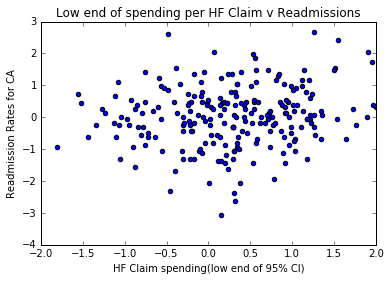

In [217]:
plt.scatter((trial_state_features['CA']['PAYM_30_HF_low']), trial_state_target['CA'])
plt.xlim(-2,2)
plt.xlabel('HF Claim spending(low end of 95% CI)')
plt.ylabel('Readmission Rates for CA')
plt.title('Low end of spending per HF Claim v Readmissions')
plt.show()

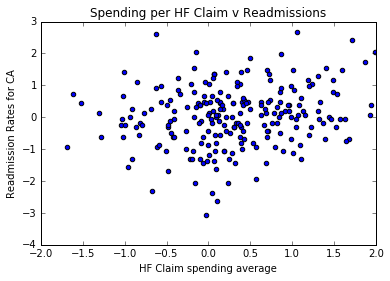

In [218]:
plt.scatter((trial_state_features['CA']['PAYM_30_HF']), trial_state_target['CA'])
plt.xlim(-2,2)
plt.xlabel('HF Claim spending average')
plt.ylabel('Readmission Rates for CA')
plt.title('Spending per HF Claim v Readmissions')
plt.show()

In [219]:
trial_state_models_lreg['TX'].coef_

array([  5.28923862e-02,   8.57876178e-02,  -7.39780865e-04,
         1.23999069e-01,  -2.64016719e-01,  -5.26091481e-02,
         2.05995166e-02,   9.68675527e-02,   2.42122280e-02,
        -2.51347516e+00,   1.10169458e+00,   1.42628171e+00])

In [220]:
state = list(features.State.unique())
len(state)

50

In [221]:
trial_state_model_aves = {}
for i in trial_states:
    trial_state_model_aves[i] = trial_state_target[i].mean()

In [222]:
import gzip
import dill

In [223]:
with gzip.open('state_model_aves.dill.gz', 'w') as ff:
   dill.dump(trial_state_model_aves, ff)

In [224]:
list1 = []
for i in trial_states:
    
    list1.append(trial_state_target[i].mean())
print list1

[0.025978730771801628, 0.4557704017915087, -0.2074848215299215, 0.0941731856369109]


In [225]:
trial_state_coef = {}
for i in trial_states: 
    features_hf_cols
    trial_state_coef[i] = {z[0]:z[1] for z in zip(features_hf_cols, np.absolute(trial_state_models_lreg[i].coef_))}

In [226]:
import operator
important_features = {}
for i in trial_states:
    important_features[i] = max(trial_state_coef[i].iteritems(), key=operator.itemgetter(1))[0]

In [227]:
important_features

{'CA': 'PAYM_30_HF',
 'FL': 'PAYM_30_HF',
 'IL': 'PAYM_30_HF',
 'TX': 'PAYM_30_HF'}

In [228]:
with gzip.open('important_features.dill.gz', 'w') as fff:
   dill.dump(important_features, fff)

In [229]:
important_features['IL']

'PAYM_30_HF'

In [230]:
#Model eval. I want to loop through the values of state targets
score = []
for i in trial_states:
    
    scores = cross_val_score(trial_state_models_lreg[i], trial_state_features[i], trial_state_target[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score.append(scores)
print score

[-0.81840168632863575, -1.1121782954381336, -0.73997752543875595, -1.3875320041903609]


/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mea

In [231]:
score_r2 = []
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features[i], trial_state_target[i], test_size=.2, 
                                                        random_state=1)
    scores_r2 = trial_state_models_lreg[i].score(X_train, y_train, sample_weight=None)
    score_r2.append(scores_r2)
print score_r2

[0.14659189358405511, 0.23470492645625018, 0.13917435661467714, 0.16226088785062154]


### Linear Reg-Including 0s insteAd of NaNs - CA predictions

In [232]:
CA = pd.DataFrame()
CA['Actual_Rates'] = trial_state_target['CA']

In [233]:
CA['Predicted_Rates'] = trial_state_models_lreg['CA'].predict(trial_state_features['CA'])

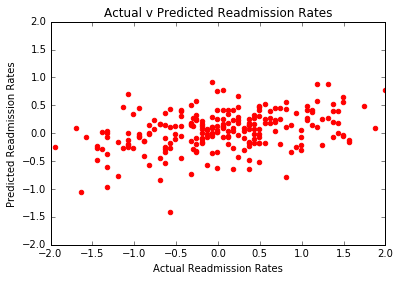

In [234]:
plt.scatter(CA['Actual_Rates'], CA['Predicted_Rates'], color='red')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('Actual Readmission Rates')
plt.ylabel('Predicted Readmission Rates')
plt.title('Actual v Predicted Readmission Rates')
plt.show()

### Linear regression on normalized data with imputed means instead of NaNs

In [235]:
trial_state_dbs_impute_norm = {} # Dict of state by state datasets
full_hf_impute = full_imputed_norm[features_hf_cols]
for i in trial_states: 
    trial_state_dbs_impute_norm[i] = full_imputed_norm[full_imputed_norm['State'] == i]

In [236]:
trial_state_features_imp_lr = {}
trial_state_target_imp_lr  = {}
for i in trial_states:

    trial_state_features_imp_lr [i] = full_imputed_norm[full_imputed_norm['State'] == i][features_hf_cols]
    trial_state_target_imp_lr [i] = full_imputed_norm[full_imputed_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [237]:
trial_state_models_lreg_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_lr[i], 
                                                        trial_state_target_imp_lr[i], test_size=.2, random_state=1)
    regr = linear_model.LinearRegression()
    trial_state_models_lreg_imp[i]  = regr.fit(X_train, y_train)

In [238]:
score_lreg_imp = []
for i in trial_states:
    
    scores_lreg_imp = cross_val_score(trial_state_models_lreg_imp[i], trial_state_features_imp_lr[i], 
                                      trial_state_target_imp_lr[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score_lreg_imp.append(scores_lreg_imp)
print score_lreg_imp

[-0.8090409639308952, -1.1053038241507174, -0.70001409033827378, -1.2719723937634226]


/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mea

### Ridge regression on normalized data with imputed means instead of NaNs

In [239]:
from sklearn import linear_model

In [240]:
trial_state_features_imp_ridge = {}
trial_state_target_imp_ridge  = {}
for i in trial_states:

    trial_state_features_imp_ridge[i] = full_imputed_norm[full_imputed_norm['State'] == i][features_hf_cols]
    trial_state_target_imp_ridge[i] = full_imputed_norm[full_imputed_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [241]:
trial_state_models_ridge_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_ridge[i], 
                                                        trial_state_target_imp_ridge[i], test_size=.2, random_state=1)
    ridge = linear_model.Ridge (alpha = .5)
    trial_state_models_ridge_imp[i]  = ridge.fit(X_train, y_train)

In [242]:
score_ridge_imp = []
for i in trial_states:
    
    scores_ridge_imp = cross_val_score(trial_state_models_ridge_imp[i], trial_state_features_imp_ridge[i], 
                                      trial_state_target_imp_ridge[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score_ridge_imp.append(scores_ridge_imp)
print score_ridge_imp

[-0.81166331002817105, -1.0895706651776695, -0.6963671991146303, -1.2500350881896936]


/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mea

In [243]:
trial_state_features_imp_ridge = {}
trial_state_target_imp_ridge  = {}
for i in trial_states:

    trial_state_features_imp_ridge[i] = full_imputed_norm[full_imputed_norm['State'] == i][features_hf_cols]
    trial_state_target_imp_ridge[i] = full_imputed_norm[full_imputed_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

trial_state_models_ridge_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_ridge[i], 
                                                        trial_state_target_imp_ridge[i], test_size=.2, random_state=1)
    ridge = linear_model.Ridge (alpha = .5)
    trial_state_models_ridge_imp[i]  = ridge.fit(X_train, y_train)

In [244]:
trial_state_models_ridge_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_ridge[i], 
                                                        trial_state_target_imp_ridge[i], test_size=.2, random_state=1)
    ridge = linear_model.Ridge (alpha = .5)
    trial_state_models_ridge_imp[i]  = ridge.fit(X_train, y_train)

In [245]:
score_ridge_imp = []
for i in trial_states:
    
    scores_ridge_imp = cross_val_score(trial_state_models_ridge_imp[i], trial_state_features_imp_ridge[i], 
                                      trial_state_target_imp_ridge[i], cv=5, 
                             scoring='neg_mean_squared_error').mean()
    score_ridge_imp.append(scores_ridge_imp)
print score_ridge_imp

[-0.81166331002817105, -1.0895706651776695, -0.6963671991146303, -1.2500350881896936]


/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mea

### Support Vector regression on normalized data with imputed means instead of NaNs

In [246]:
from sklearn.svm import SVR

In [247]:
trial_state_features_imp_SVR = {}
trial_state_target_imp_SVR  = {}
for i in trial_states:

    trial_state_features_imp_SVR[i] = full_imputed_norm[full_imputed_norm['State'] == i][features_hf_cols]
    trial_state_target_imp_SVR[i] = full_imputed_norm[full_imputed_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

#### Linear SVR

In [248]:
trial_state_models_SVRl_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_SVR[i], 
                                                        trial_state_target_imp_SVR[i], test_size=.2, random_state=1)
    svr_lin = SVR(kernel='linear')
    trial_state_models_SVRl_imp[i]  = svr_lin.fit(X_train, y_train)

In [249]:
h = SVR()

In [250]:
score_SVRl_imp = []
for i in trial_states:
    
    scores_SVRl_imp = cross_val_score(trial_state_models_SVRl_imp[i], trial_state_features_imp_SVR[i], 
                                      trial_state_target_imp_SVR[i], cv=5, scoring='mean_squared_error').mean()
    score_SVRl_imp.append(scores_SVRl_imp)
print score_SVRl_imp

[-0.82698998079003072, -1.0480191629295472, -0.72021856576838739, -1.2318399197632144]


/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mea

#### Nonlinear SVR

In [251]:
trial_state_models_SVRnl_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_SVR[i], 
                                                        trial_state_target_imp_SVR[i], test_size=.2, random_state=1)
    svr_nlin = SVR(kernel='poly')
    trial_state_models_SVRnl_imp[i]  = svr_nlin.fit(X_train, y_train)

In [252]:
score_SVRnl_imp = []
for i in trial_states:
    
    scores_SVRnl_imp = cross_val_score(trial_state_models_SVRnl_imp[i], trial_state_features_imp_SVR[i], 
                                      trial_state_target_imp_SVR[i], cv=5, scoring='mean_squared_error').mean()
    score_SVRnl_imp.append(scores_SVRnl_imp)
print score_SVRnl_imp

[-1.0382653958006969, -1.1828526300066384, -1.1737179899373742, -1.5630149541213705]


/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mea

### RF regression on normalized data with imputed means instead of NaNs

In [253]:
from sklearn.ensemble import RandomForestRegressor

In [254]:
trial_state_features_imp_rf = {}
trial_state_target_imp_rf  = {}
for i in trial_states:

    trial_state_features_imp_rf[i] = full_imputed_norm[full_imputed_norm['State'] == i][features_hf_cols]
    trial_state_target_imp_rf[i] = full_imputed_norm[full_imputed_norm['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [255]:
trial_state_models_rf_imp = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_imp_rf[i], 
                                                        trial_state_target_imp_rf[i], test_size=.2, random_state=1)
    rf = RandomForestRegressor()
    trial_state_models_rf_imp[i]  = rf.fit(X_train, y_train)

In [256]:
score_rf_imp = []
for i in trial_states:
    
    scores_rf_imp = cross_val_score(trial_state_models_rf_imp[i], trial_state_features_imp_rf[i], 
                                      trial_state_target_imp_rf[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score_rf_imp.append(scores_rf_imp)
print score_rf_imp

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mea

[-0.92079570397142363, -1.1401527006523546, -0.80155575375667154, -1.3303696482897416]


/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.



### RF using imputed, non-normalized data

In [257]:
trial_state_dbs_rf = {} # Dict of state by state datasets
full_hf_rf = full_imputed[features_hf_cols]

for i in trial_states: 
    trial_state_dbs_rf = full_imputed[full_imputed['State'] == i]

In [258]:
trial_state_features_rf = {}
trial_state_target_rf = {}
for i in trial_states:

    trial_state_features_rf[i] = full_imputed[full_imputed['State'] == i][features_hf_cols]
    trial_state_target_rf[i] = full_imputed[full_imputed['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [350]:
trial_state_models_rf = {}
trial_state_predict_rf = {}

for i in trial_states:
    rf = RandomForestRegressor()
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_rf[i], trial_state_target_rf[i], 
                                                        test_size=.2, random_state=1)
    trial_state_models_rf[i]  = rf.fit(X_train, y_train)
    trial_state_predict_rf[i] = trial_state_models_rf[i].predict(X_train)

In [260]:
# regressor = RandomForestRegressor(oob_score=True)

# regressor.fit(x,y)

# out_of_bag_prediction_for_x = regressor.oob_prediction_

# print(your_error_metric(out_of_bag_prediction_for_x, x))

In [307]:
score_rf = []
for i in trial_states:
    
    scores_rf = cross_val_score(trial_state_models_rf[i], trial_state_features_rf[i], trial_state_target_rf[i], cv=5, 
                             scoring='neg_mean_squared_error').mean()
    score_rf.append(scores_rf)
print score_rf

[-2.4412636574074078, -3.2253823678160911, -2.1556850000000005, -3.4995460899470898]


In [262]:
range_HF = max(full_imputed['READM_30_HF']) - min(full_imputed['READM_30_HF'])
range_HF

15.0

In [263]:
trial_state_predict_rf['CA']

array([ 24.04      ,  21.2       ,  21.53      ,  21.85      ,
        22.99      ,  21.14      ,  22.6       ,  19.12      ,
        21.76      ,  21.87      ,  21.22      ,  21.77      ,
        21.81      ,  21.81      ,  22.25      ,  19.81      ,
        22.26      ,  23.05      ,  22.25      ,  20.85      ,
        22.53      ,  23.63      ,  20.02      ,  23.61      ,
        21.88      ,  20.5       ,  22.31      ,  23.03      ,
        20.92      ,  22.2       ,  23.47      ,  21.72      ,
        21.58      ,  23.12      ,  23.34      ,  21.66      ,
        24.58      ,  22.92      ,  21.86      ,  21.66      ,
        22.15      ,  20.11      ,  21.2       ,  20.09      ,
        21.14      ,  22.65      ,  21.74      ,  23.87      ,
        20.76      ,  22.42      ,  24.03      ,  20.89333333,
        20.49      ,  21.41      ,  21.25      ,  23.91      ,
        22.29      ,  22.02      ,  22.73      ,  22.54      ,
        22.71      ,  21.55      ,  20.56      ,  21.93

In [264]:
from sklearn.metrics import mean_squared_error

In [332]:
 X_train, X_test, y_train, y_test = train_test_split(trial_state_features_rf['CA'], trial_state_target_rf['CA'], 
                                                        test_size=.2, random_state=1)

In [333]:
len(X_train)

192

In [310]:
mean_squared_error(y_train,trial_state_predict_rf['CA']) #training error for CA

0.44839079861111131

In [311]:
print score_rf[0] #cross_val error for CA. 
#There is overfitting

-2.44126365741


### Selecting features

In [327]:
features_hf_cols

['PSI_4_SURG_COMP',
 'PSI_12_POSTOP_PULMEMB_DVT',
 '1 through 30 days After Discharge from Index Hospital Admission_inpatient',
 '1 through 30 days After Discharge from Index Hospital Admission_outpatient',
 'During Index Hospital Admission_inpatient',
 'AHRQ_PSI_90_Score',
 'MRSA_Score',
 'CAUTI_Score',
 'CDI_Score',
 'PAYM_30_HF',
 'PAYM_30_HF_low',
 'PAYM_30_HF_high']

In [328]:
features_hf_cols1 = ['1 through 30 days After Discharge from Index Hospital Admission_inpatient', 
                    '1 to 3 days Prior to Index Hospital Admission_inpatient', 'During Index Hospital Admission_inpatient',
                   '1 through 30 days After Discharge from Index Hospital Admission_outpatient',
                   '1 to 3 days Prior to Index Hospital Admission_outpatient', 'AHRQ_PSI_90_Score', 'CLABSI_Score',
                   'CAUTI_Score', 'SSI_Score', 'MRSA_Score','CDI_Score', 'PAYM_30_HF', 'PAYM_30_HF_low','PAYM_30_HF_high',
                   'H_COMP_1_STAR_RATING','H_COMP_2_STAR_RATING','H_COMP_3_STAR_RATING','H_COMP_4_STAR_RATING',
                    'H_COMP_5_STAR_RATING','H_COMP_6_STAR_RATING','H_COMP_7_STAR_RATING','H_RECMND_STAR_RATING']

#### Trying RF again with new features

In [329]:
trial_state_features_rf1 = {}
trial_state_target_rf1 = {}
for i in trial_states:

    trial_state_features_rf1[i] = full_imputed[full_imputed['State'] == i][features_hf_cols1]
    trial_state_target_rf1[i] = full_imputed[full_imputed['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [330]:
trial_state_models_rf1 = {}
for i in trial_states:
    X_train, X_test, y_train, y_test = train_test_split(trial_state_features_rf1[i], trial_state_target_rf1[i], 
                                                        test_size=.2, random_state=1)
    trial_state_models_rf1[i]  = rf.fit(X_train, y_train)

In [331]:
score_rf1 = []
for i in trial_states:
    
    scores_rf1 = cross_val_score(trial_state_models_rf1[i], trial_state_features_rf1[i], trial_state_target_rf1[i], cv=5, 
                             scoring='mean_squared_error').mean()
    score_rf1.append(scores_rf1)
print score_rf1

[-2.169525370370371, -2.8371665057471267, -2.2689574999999991, -3.5627545873015878]


## Feature Selection

In [ ]:
### I added more features to the RF and the predictions didn't get better - got a little worse/stayed the same
## Next steps - See which features are highly correlated and remove those
## Recursive feature elimination
## Hyperparameter Optimization

In [342]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 64 columns):
Hospital Name                                                                 2431 non-null object
State                                                                         2431 non-null object
READM_30_HF                                                                   2431 non-null float64
COMP_HIP_KNEE                                                                 2431 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2431 non-null float64
PSI_13_POST_SEPSIS                                                            2431 non-null float64
PSI_14_POSTOP_DEHIS                                                           2431 non-null float64
PSI_15_ACC_LAC                                                                2431 non-null float64
PSI_3_ULCER                                                                   2431 non-null flo

#### Removing highly correlated features

In [353]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(20,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1,-.7,-.5,-.25,0,.25,.5,.7,.8,.90,1])
    plt.ylim()
    plt.show()

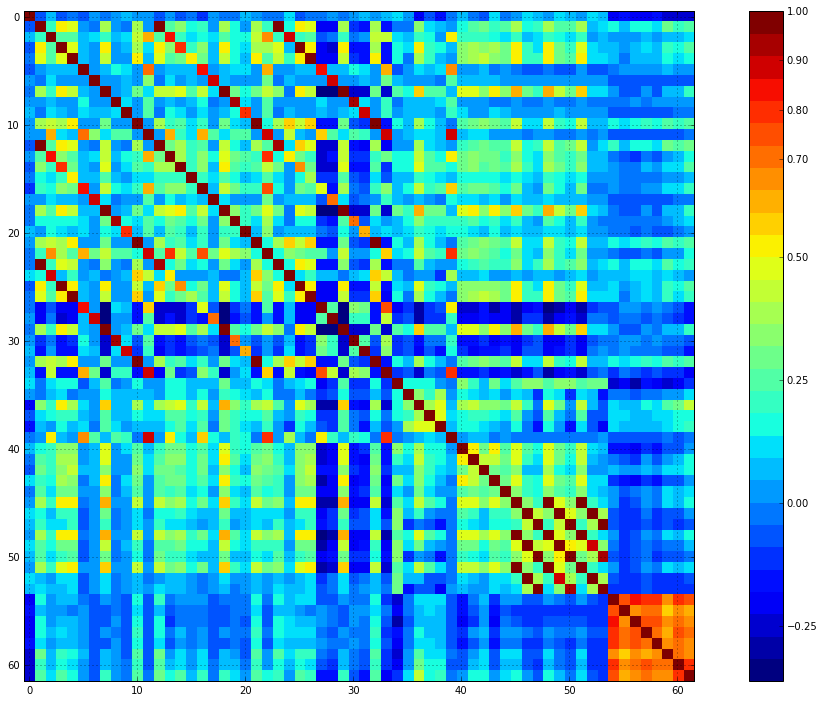

In [354]:
correlation_matrix(features)

In [384]:
cols_corrl_target = ['PSI_90_SAFETY', 'PSI_90_SAFETY_low', 'PSI_7_CVCBI_low']

In [282]:
corrl_cols = [5,6,7,8,9,10,11,12,13,17,21,22,45,46,47]

In [306]:
len(features.columns) - len(corrl_cols)

49

In [296]:
corrl_colnames = ['PSI_13_POST_SEPSIS','PSI_14_POSTOP_DEHIS','PSI_15_ACC_LAC','PSI_3_ULCER','PSI_4_SURG_COMP','PSI_6_IAT_PTX',
'PSI_7_CVCBI','PSI_8_POST_HIP', 'PSI_90_SAFETY','PSI_14_POSTOP_DEHIS_low','PSI_6_IAT_PTX_low','PSI_7_CVCBI_low',
 'MRSA_Score', 'CDI_Score', 'PAYM_30_AMI']

In [302]:
clean_features = pd.DataFrame()
for i in features.columns:
    if i not in corrl_colnames:
        clean_features[i] = features[i]

In [303]:
clean_features.info() #features and target with correkated features removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2431 entries, 0 to 2430
Data columns (total 49 columns):
Hospital Name                                                                 2431 non-null object
State                                                                         2431 non-null object
READM_30_HF                                                                   2431 non-null float64
COMP_HIP_KNEE                                                                 2431 non-null float64
PSI_12_POSTOP_PULMEMB_DVT                                                     2431 non-null float64
COMP_HIP_KNEE_low                                                             2431 non-null float64
PSI_12_POSTOP_PULMEMB_DVT_low                                                 2431 non-null float64
PSI_13_POST_SEPSIS_low                                                        2431 non-null float64
PSI_15_ACC_LAC_low                                                            2431 non-null flo

### Building RF model for all states - using recursive feature elimination and gridsearch for each state

In [317]:
state_features_rf = {}
state_target_rf = {}
for i in states:

    state_features_rf[i] = clean_features[clean_features['State'] == i].iloc[:,3:]
    state_target_rf[i] = clean_features[clean_features['State'] == i].READM_30_HF
# These features dont contain the states or hospital names

In [361]:
for i in state_features_rf:
    print "State name: %s and length %s." %(i, len(state_features_rf[i]))

State name: WA and length 38.
State name: DE and length 5.
State name: WI and length 40.
State name: WV and length 27.
State name: HI and length 12.
State name: FL and length 147.
State name: WY and length 7.
State name: NH and length 13.
State name: NJ and length 45.
State name: NM and length 23.
State name: TX and length 200.
State name: LA and length 65.
State name: NC and length 67.
State name: ND and length 5.
State name: NE and length 13.
State name: TN and length 68.
State name: NY and length 112.
State name: PA and length 121.
State name: CA and length 240.
State name: NV and length 20.
State name: VA and length 56.
State name: CO and length 32.
State name: AK and length 8.
State name: AL and length 64.
State name: AR and length 37.
State name: VT and length 5.
State name: IL and length 102.
State name: GA and length 78.
State name: IN and length 52.
State name: IA and length 28.
State name: OK and length 47.
State name: AZ and length 44.
State name: ID and length 9.
State name

In [369]:
long_states = []
for i in states:
    if i in ['DE','HI','WY','NH','ND','NE','AK','VT','ID','MD','RI','MT']:
        pass
    else:
        long_states.append(i)

In [370]:
len(long_states)#Over 15 features

38

In [363]:
from sklearn.feature_selection import RFE

In [371]:
from sklearn import grid_search
state_models_rf = {}
state_gridsearch = {}
state_model_topfeat = {}

for i in long_states:
    X_train, X_test, y_train, y_test = train_test_split(state_features_rf[i], state_target_rf[i], 
                                                        test_size=.2, random_state=1)
    clf = RandomForestRegressor()
    PARAMETERS = {'max_features':['auto','sqrt',0.2], 'max_leaf_nodes':[None,5,6,7,8,9,10,50], 
              'min_samples_leaf':[1,2,4,50], 'n_estimators':[6,8,10,20,25]}
    SCORING = 'mean_squared_error'

    #Grid Search
    clf = grid_search.GridSearchCV(clf, PARAMETERS, scoring=SCORING, cv=3, verbose=True)
    clf.fit(X_train, y_train)

    #After completion, add the final best results to dict
    state_gridsearch[i] = clf.best_estimator_
    
    #recursive feature elimination
    rfecv = RFE(estimator=state_gridsearch[i], n_features_to_select=(len(X_train))/2, step=1)
    
    # Putting models in dict
    state_models_rf[i] = rfecv.fit(X_train, y_train)
    
    q = state_models_rf[i].ranking_
    q_list = list(q)
    
    # Putting important feature indexes in dict
    state_model_topfeat[i] = [z for z, x in enumerate(q_list) if x == 1]

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.5min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.5min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.6min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.6min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.5min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.7min finished


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  1.6min finished


In [373]:
state_model_topfeat['NM']

[30, 35, 36, 37, 39, 40, 41, 42, 43]

In [395]:
h = RFE(estimator=rf, n_features_to_select=(len(X_train))/2, step=1)

In [397]:

selector = RFECV(rf, step=1, cv=3, scoring="neg_mean_squared_error")
clf = grid_search.GridSearchCV(selector, PARAMETERS, scoring=SCORING, cv=3, verbose=True)
clf.fit(X_train,y_train)
print clf.best_estimator_.estimator_
print clf.best_estimator_.ranking_
print clf.best_estimator_.score(X, y)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


ValueError: Invalid parameter max_features for estimator RFECV. Check the list of available parameters with `estimator.get_params().keys()`.

In [385]:
score_rf = []
for i in long_states:
    
    scores_rf = cross_val_score(state_models_rf[i], state_features_rf[i], state_target_rf[i], cv=3, 
                             scoring='neg_mean_squared_error').mean()
    score_rf.append(scores_rf)
print score_rf

[-1.2760854288674588, -2.6211166887917376, -3.5067224611398053, -2.0084620637938522, -1.8661855621772183, -2.6844064153439144, -2.6966928160596892, -2.3574725406962558, -2.7239336731252863, -3.2102546132222827, -3.399790110360847, -1.1895292773498867, -3.8454722222222233, -2.5280806840671115, -2.7429256810897438, -2.9972069039351807, -2.1936853571428561, -1.9035561025716092, -2.468320152505449, -1.7132093617592552, -3.648209501674549, -3.3311189304218147, -1.543304172565241, -1.6768357547031165, -2.7122729138184565, -2.0782492729344928, -1.2681744037202385, -2.1922426251856826, -2.415625043547919, -2.5573447933638058, -1.7920453189300398, -1.9498405193021482, -1.9024702982709243, -2.9709475243904158, -2.9002140225842932, -2.1584193539997525, -1.889444871794872, -2.2290566922779482]


In [386]:
print len(score_rf)

38


In [394]:
score_rf_training = [] 
for i in long_states:
    X_train, X_test, y_train, y_test = train_test_split(state_features_rf[i], state_target_rf[i], 
                                                        test_size=.2, random_state=1)
    scores_rf_training = mean_squared_error(y_train,(state_models_rf[i].predict(X_train)))
    score_rf_training.append(scores_rf_training)
print score_rf_training

[0.38685086669421653, 1.0281517513190304, 0.77388656011169876, 1.399945379719574, 0.461317062653957, 1.145506535947713, 1.578948063789855, 0.96106401915312412, 0.59078145285049988, 1.2130555813269892, 0.98921183121170764, 1.224383573388202, 0.5487406976744188, 0.7666172135499103, 0.31773958333333324, 0.23447745794631983, 0.24066887755102115, 0.37313533235013063, 0.35329523809523794, 0.43201921777137964, 1.3686990915304731, 1.3699813606819589, 1.3601882203076043, 0.71209176793981555, 0.95940278674776869, 0.75968839991614268, 0.22640497554287792, 0.59856333814152851, 1.0695084269121593, 0.51498086548878907, 0.23416353202160384, 0.38692964044842926, 1.174644558070735, 0.67687478298611159, 0.89616252022456844, 0.54470565609369992, 0.47226875000000113, 0.87452716793409546]


### Recursive Feature Selection for each state

In [334]:
 X_train, X_test, y_train, y_test = train_test_split(trial_state_features_rf['CA'], trial_state_target_rf['CA'], 
                                                        test_size=.2, random_state=1)

In [338]:
test['CA']

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [342]:
(len(state_features_rf['CA'])/5)

48

In [345]:
for i in ['CA','TX']:
    rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), 
                  scoring='neg_mean_squared_error')
    z = rfecv.fit(state_features_rf[i], state_target_rf[i])
    q = z.ranking_
    q_list = list(q)
    indices = [i for i, x in enumerate(q_list) if x == 1]
    print indices

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


Optimal number of features : 10
[1 1 1 1 1 1 1 1 2 1 3 1]
[0, 1, 2, 3, 4, 5, 6, 7, 9, 11]


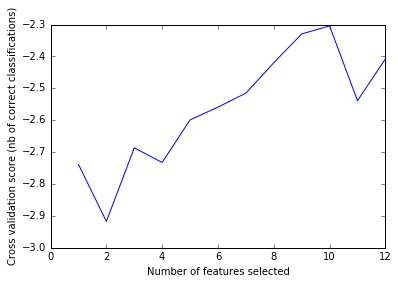

In [337]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
rf = RandomForestRegressor()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(2),
              scoring='neg_mean_squared_error')
z = rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
q = z.ranking_
print q
q_list = list(q)
indices = [i for i, x in enumerate(q_list) if x == 1]
print indices
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()